NLP yani Doğal Dil İşleme, doğal dillerin kurallı yapısının çözümlenerek anlaşılması veya yeniden üretilmesi amacını taşır. Bu çözümlemenin insana getireceği kolaylıklar, yazılı dokümanların otomatik çevrilmesi, soru-cevap makineleri, otomatik konuşma ve komut anlama, konuşma sentezi, konuşma üretme, otomatik metin özetleme, bilgi sağlama gibi birçok başlıkla özetlenebilir. Bilgisayar teknolojisinin yaygın kullanımı, bu başlıklardan üretilen uzman yazılımların gündelik hayatımızın her alanına girmesini sağlamıştır. Örneğin, tüm kelime işlem yazılımları birer imlâ düzeltme aracı taşır. Bu araçlar aslında yazılan metni çözümleyerek dil kurallarını denetleyen doğal dil işleme yazılımlarıdır. [1]

Kısacası doğal dil işlemeyle insanların konuştuğu dili bilgisayarlara öğretmeye ve çeşitli uygulamalarla hayatımızı kolaylaştırmaya çalışıyoruz. Bunlardan bazıları:

- Arama motorları
- Sanal asistanlar
- Spam tespiti
- Otomatik Çeviri
- Duygu Analizi

Günlük hayatta birçok kullanım alanı olan doğal dil işlemeyi temel olarak iki gruba ayırmak mümkün: metin işleme (text processing) ve ses işleme (speech processing). Bu yazıda metin işleme süreçleri (text processing) üzerinde duracağız.

Kütüphanelerimizi çağıralım.

In [1]:
import numpy as np 
import base64
import numpy as np
import pandas as pd

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('data/toxic_comment.csv')

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Wikipedia yorumlarını ve bu yorumların hangi kategorilere girdiğini görüyoruz. Bu haliyle hiçbir şey yapamayacağımız aşikar. Önce cümleleri parçalayalım.

In [5]:
train['comment_text'].str.split().head()

0    [Explanation, Why, the, edits, made, under, my...
1    [D'aww!, He, matches, this, background, colour...
2    [Hey, man,, I'm, really, not, trying, to, edit...
3    [", More, I, can't, make, any, real, suggestio...
4    [You,, sir,, are, my, hero., Any, chance, you,...
Name: comment_text, dtype: object

In [6]:
train['comment_text'].str.split(expand=True).head()

,0,1,2,3,4,5,6,7,8,9,...,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410
0,Explanation,Why,the,edits,made,under,my,username,Hardcore,Metallica,...,None,None,None,None,None,None,None,None,None,None
1,D'aww!,He,matches,this,background,colour,I'm,seemingly,stuck,with.,...,None,None,None,None,None,None,None,None,None,None
2,Hey,"man,",I'm,really,not,trying,to,edit,war.,It's,...,None,None,None,None,None,None,None,None,None,None
3,"""",More,I,can't,make,any,real,suggestions,on,improvement,...,None,None,None,None,None,None,None,None,None,None
4,"You,","sir,",are,my,hero.,Any,chance,you,remember,what,...,None,None,None,None,None,None,None,None,None,None


In [7]:
train['comment_text'].str.split(expand=True).unstack().head()

0  0    Explanation
   1         D'aww!
   2            Hey
   3              "
   4           You,
dtype: object

Cümleleri parçaladık ve sayılabilir bir duruma getirdik. En çok kullanılan kelimeleri interaktif Plotly kütüphanesiyle görselleştirelim.

In [8]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

words = train['comment_text'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = words.index.values[:30],
            y = words.values[:30],
            marker= dict(colorscale='Jet',
                         color = words.values[:30]),
            text='ranking'
    )]
layout = go.Layout(
    title='Word Frequency Ranking'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='ranking')

Biz bu kadar emeği hiç harcamadan da en çok kullanılan yukarıdaki kelimeleri tahmin edebilirdik. Bunlar hemen her romanda, gazete yazısında, internet sitesinde yoğun olarak kullanılan kelimeler zaten, bunlardan kurtulmamız lazım.

Çok kullanılan ve metinle ilgili yeterli bilgi vermeyen 190 kelimelik bir liste halihazırda Python’da mevcut.

In [9]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
print("The number of stopwords is {0}".format(len(stopwords)))
print(stopwords)

The number of stopwords is 190
{'who', 'like', 'between', "don't", 'what', 'under', 'and', 'below', 'only', 'each', "wouldn't", 'cannot', 'ought', "you've", 'as', "won't", 'own', 'but', "can't", "mustn't", 'me', 'were', "they'd", 'while', "haven't", 'they', 'that', 'do', "he's", 'our', 'http', "isn't", 'more', 'we', "who's", 'once', 'or', "wasn't", 'ever', 'would', "hasn't", "you'll", "couldn't", 'i', "shan't", "she'd", 'yourself', 'up', 'himself', 'can', 'its', "i'd", 'am', 'not', 'out', 'how', "when's", 'your', "shouldn't", 'during', 'else', "he'd", 'too', "what's", 'was', 'have', "hadn't", "there's", 'r', "we'll", "we've", 'my', 'some', 'the', 'yourselves', "we're", 'having', "why's", 'www', 'very', 'from', 'about', 'against', 'does', 'over', 'them', 'this', 'all', 'when', 'get', "where's", 'their', 'by', "that's", 'both', 'where', 'any', 'her', 'him', 'shall', 'theirs', 'into', "how's", "they're", 'then', "he'll", 'again', 'if', 'on', 'his', "she's", "weren't", 'an', "we'd", 'since

Bu kelimelerden kurtulup en çok kullanılan kelimelerden oluşan bir kelime bulutu (Word Cloud) yapalım. Standart bir bulut olmaması için Sherlock resminin base64 koduna çevrilmiş halini kullanalım.

In [10]:
sherlock = b'iVBORw0KGgoAAAANSUhEUgAAAnsAAAMOCAYAAABmrMBRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAN1wAADdcBQiibeAAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAAAXdEVYdFRpdGxlAEhvbG1lcyBzaWxob3VldHRljWN/WAAAAB10RVh0QXV0aG9yAGVkaXRlZCBieSBQYXVsIFNoZXJtYW4ZKSawAAAAGHRFWHRDcmVhdGlvbiBUaW1lADEyLzI3LzIwMTOCYNxYAAAAWHRFWHRDb3B5cmlnaHQAQ0MwIFB1YmxpYyBEb21haW4gRGVkaWNhdGlvbiBodHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9wdWJsaWNkb21haW4vemVyby8xLjAvxuO9+QAAIABJREFUeJzs3XeUVHWe/vGnIyASJacGFARRTIggYQQEHAmCsoKArgHUMeAgpsExoM6AEQUEQYKIINhkQUI3IEgQGpqcQXJO3Q1N56rfHzPLz2yHqvpU3ft+nePZ9dhd9z2zs3MevrfqVpjX6/UKAAAAjhRuHQAAAAD/YewBAAA4GGMPAADAwRh7AAAADsbYAwAAcDDGHgAAgINFWgcAcB+Px6MdO3Zo7969Onz4sI4dO6bDhw/r+PHjysrK+sPfLVGihMLDw1W4cGFVqVJFlStXVrVq1S79zzJlygToXwUAhAbGHoCAyMrK0uzZs/XVV18pPj5eycnJfrlO6dKlVbt2bV199dW6+uqrVa9ePTVu3Fhly5b1y/UAINiF8VBlAP509uxZjRo1SsOGDdORI0fMOmrVqqVGjRqpcePGatWqlWrXrm3WAgCBxNgD4BenT5/Wm2++qbFjxyo1NdU651euuuoqtWvXTnfddZf+8pe/qFChQtZJAOAXjD0APpWVlaVhw4bpzTffVFJSknVOrhQrVkwdO3ZU165d1aZNG4YfAEdh7AHwmR07dqhHjx5KTEy0Tsm3kiVLqnPnznriiSfUsGFD6xwAKDDGHgCf+Oyzz/T3v/9dFy9etE7xmdtuu01///vf1blzZ0VG8nk2AKGJsQegQHJycvTss8/qk08+sU7xm+rVq2vAgAHq2bOnwsN5PCmA0MLYA5BvGRkZuvfeezV37lzrlIC48cYb9d5776lVq1bWKQCQa/wRFUC+eL1e9erVyzVDT5LWr1+vO+64Q+3atdPmzZutcwAgVxh7APJlxIgR+vLLL60zTHz77be64YYb9NBDD2nnzp3WOQDwh7iNCyDPLly4oGrVquncuXPWKebCw8PVsWNHvfDCC7rtttuscwDgVzjZA5BnkyZNYuj9l8fj0cyZM9WkSRPddtttmjhxojIyMqyzAOASTvYA5FmbNm0UFxdnnRG0ihcvrm7duumpp55S/fr1rXMAuBxjD0CeeL1eFS9eXBcuXLBOCXrh4eFq3bq1/va3v6l9+/aKiIiwTgLgQow9AHly6NAhVatWLaDXLFmypMLCwpSRkRGyD22uWrWqevfurV69eqlixYrWOQBchLEHIE+2b9+ua665xm+vX7VqVd19991q3bq16tSpo2rVqqlw4cKX/nl6errOnDmjkydPavPmzdqyZYuWL1+uNWvWKCcnx29dvhIVFaVWrVqpS5cu6tSpk6644grrJAAOx9gDkCcbN27UDTfc4PPXjYmJ0eDBg9WxY8d83e48ffq0pk6dqg8++EB79uzxeZ8/REZG6vbbb1eXLl3UuXNnlStXzjoJgAMx9gDkSWJiom6++Wafvma9evW0fPlylSxZssCvlZOTo08++UQvvfSS0tPTfVAXGOHh4br++uvVsmVLtWrVSs2aNdPll19unQXAARh7APLkzJkzKlOmjE9fc9GiRWrZsqVPX3PVqlVq2bJlSA2+n4qKilLDhg3VqlUrNWnSRA0aNFDp0qWtswCEIMYegDwrX768Tp486bPXu3DhgooWLeqz1/s/7733nl588UWfv66VmjVr6pZbblGDBg3UoEED3XTTTSpevLh1FoAgx9gDkGctWrTQd99957PXO3bsmCpUqOCz1/vp61aqVMnnrxsswsPDVbNmTdWqVUt16tRR7dq1Vbt2bdWqVUtVq1a1zgMQJCKtAwCEnrZt2/p07E2cOFH9+vXz2ev9H3+cFgYTj8ejPXv2aM+ePZo3b97P/lnRokVVu3Zt1axZU1WqVFHlypVVsWJFVatWTRUrVlSVKlVUpEgRo3IAgcTJHoA827Nnj2rVquWz14uOjtawYcPUq1cvhYWF+ex1Fy9erFatWvns9ZymVKlSqlSpkipVqqSyZcuqTJkyKlu2rMqWLaty5cpd+vsyZcr4/H2aAAKHsQcgX2666SatX7/ep6954403qk+fPmrXrp3Kli1boNfyeDzq0KGDvv32Wx/VuVtERISKFy+uEiVKqGjRoipatOgf/n3hwoUv/Y4klShRQuHh4SpSpIgKFy6syMhIFStW7Gf/7Kc/D8B3GHsA8mX8+PF66KGH/PLa4eHhuvnmm3XnnXfq1ltv1Y033pin997t2rVL/fr105w5c/zSB//7v1Eo/ee7hiMiIhQeHq7SpUurVKlSKlWq1G/+7zExMapZs6ZKlChh/K8ACB6MPQD5kp2drXr16mnXrl0BuV7ZsmVVt25d1a5dW9WrV1exYsUujQGv16sTJ07o2LFjWrVqlTZu3BiQJgSvMmXKqGbNmrryyit15ZVXqlGjRmratCkjEK7E2AOQb19++aUeeOAB6wwgV8LDw1W/fn01a9ZMzZs3V5s2bbhtDFdg7AHIN6/Xq/bt2/O+OISkiIgINWrUSP/zP/+je+65h8fVwLEYewAK5NChQ6pfv76SkpKsU4B8i4iIUMuWLfXII4+oU6dOl94iADgBYw9AgX311Vfq3r27dQZcqly5cpe+R9jr9erkyZNKTU3N9+uVKlVKPXr0UN++fVWzZk1fZQJmGHsAfOKNN97QgAEDrDPgEhEREerbt6+efvppxcTE/Oqfp6am6vDhwzp69Kh2796tXbt2afv27VqxYoWSk5NzdY3IyEh1795d//jHP1SnTh1f/0sAAoaxB8Bn+vXrpw8//NA6Aw5XunRpzZgxQ82bN8/z72ZnZ2vt2rX65ptvNGbMGJ04ceJPfycyMlIvvviiXnvtNRUqVCg/yYApxh4An/F6vXrsscc0evRo6xQ4VJEiRfT999/r5ptvLvBrZWZmKjY2Vq+99pp+/PHHP/35evXqaeLEibr++usLfG0gkMKtAwA4R1hYmEaMGKHWrVtbp8ChBg0a5JOhJ/3na/p69Oihbdu26a233lJERMQf/vzWrVvVvHlzxcfH++T6QKBwsgfA5w4ePKhrrrmmQG+SB36pTJkyOnLkiKKjo/3y+jNnzlT37t2Vlpb2hz8XHR2tyZMnq3Pnzn7pAHyNkz0APletWjU9/PDD1hlwmKpVq/pt6ElSp06d9NFHH/3pz2VmZuqBBx7Qpk2b/NYC+BInewD8YsWKFWratKl1BhwkIiJC69at8/t75po1a6bly5f/6c/VrFlTa9euValSpfzaAxQUJ3sA/OK6666zToDD5OTk6N5779WePXv8ep1u3brl6ud+/PFH9evXz68tgC8w9gD4RWZmpnUCHGjv3r1q0KCBhgwZouzsbL9cIy9/UPn888+1ZMkSv3QAvsLYA+AXU6dOtU6AQyUnJ+vZZ5/VzTffrNjYWJ+PvrCwsFz/rNfr1d/+9je/DU/AFxh7AHxu1apVevHFF60z4HCbNm3Sfffdp+rVq+utt97Srl27fPK669evz9PP79y5UxMnTvTJtQF/4AMaAHwmPT1d7777rgYNGvSnj68A/OHqq69Wx44d1apVKzVo0EBXXHFFnn4/NTVVjRs31ubNm/P0e1deeaV27NihyMjIPP0eEAiMPQAF5vV69c033+i5557T3r17rXOAS2rWrKkGDRooJiZGVapUUZUqVVS8ePGf/UxWVpZOnTqlLVu2aMqUKTp48GC+rjV69Gg9+uijvsgGfIqxByDfPB6PYmNjNXDgQG3cuNE6BzBVqVIl7dy5U5dffrl1CvAzvGcPQJ5lZmZq7Nixqlu3rrp168bQAyQdPXpUTz31lHUG8Cuc7AHItczMTI0bN04DBw7UgQMHrHOAoMTtXAQbxh6AP5WZmakxY8Zo0KBB+X4/E+AW0dHRWrBggW6//XbrFEASYw/AH8jOztbYsWP15ptv6siRI9Y5QMgoVqyYli9frvr161unAIw9AL/m9Xo1depUvfrqq9q5c6d1DhCSYmJi9MMPP6hChQrWKXA5xh6An9m6dav69OmjxYsXW6cAIa9JkyaKj49X4cKFrVPgYnwaF4Ak6dSpU3rwwQdVv359hh7gIytWrFCXLl2UlZVlnQIXY+wB0KRJk1S/fn1NmDBBHo/HOgdwlLlz5+rJJ58UN9Jghe91AVzswIEDeuyxx7Rw4ULrFMDRRo8erUKFCmnYsGHWKXAhTvYAl5o4caJuvPFGhh4QIJ988okGDx5snQEX4gMagMtcuHBBTzzxhCZOnGidArhOWFiYRo4cqd69e1unwEUYe4CLHDt2TB06dNC6deusUwDXioqK0rRp09ShQwfrFLgEYw9wia1bt6pdu3Z8zRkQBAoVKqRZs2apbdu21ilwAd6zB7jA0qVL1bRpU4YeECQyMjLUuXNnLVmyxDoFLsDYAxwuNjZWbdq0UVJSknUKgJ9IS0tTu3bteK4l/I6xBzjY6NGjdf/99yszM9M6BcBvSEtLU4cOHfTdd99Zp8DBGHuAQ73//vt67LHHlJOTY50C4A9cvHhR7du31/fff2+dAofiAxqAAw0aNEj/+Mc/rDMA5MEVV1yhRYsW6frrr7dOgcMw9gAH8Xg8euaZZzR8+HDrFAD5UKJECc2fP1+NGjWyToGDMPYAh/B4PHryySc1cuRI6xQABVC6dGnFxcXppptusk6BQzD2AAfIyspSjx49FBsba50CwAeKFi2quXPn6i9/+Yt1ChyAD2gAIS4rK0vdu3dn6AEOkpqaqnbt2vEpXfgEJ3tACMvIyNC9996ruXPnWqcA8IOiRYvqm2++UYsWLaxTEMI42QNCVHZ2th588EGGHuBgqamp6tSpk1auXGmdghDG2ANCUHp6ujp27Kivv/7aOgWAn6WkpKhly5aaOXOmdQpCFGMPCDFpaWnq1KmT5s2bZ50CIEAyMjLUtWtX3puLfGHsASHk/4beggULrFMABFhmZqbuv/9+jR071joFIYaxB4SIjIwMdenSRQsXLrROAWAkJydHjz32mMaMGWOdghDC2ANCQHp6utq3b69vv/3WOgWAsZycHPXq1UsDBgywTkGIYOwBQS47O1s9e/ZUfHy8dQqAIPLGG28w+JArPGcPCGLZ2dm67777NGPGDOsUAEGqS5cumjBhggoXLmydgiDF2AOCVHZ2tu6//35NnTrVOgVAkGvRooWmT5+ukiVLWqcgCHEbFwhCHo9Hjz76KEMPQK4sWbJETZs21cGDB61TEIQYe0CQ8Xq96t27t7744gvrFAAhZOvWrWrUqJE2bNhgnYIgw9gDgszLL7/Mc7QA5MuxY8fUqlUrHtGEn2HsAUGkb9++evfdd60zAISws2fP6s4779TLL78sj8djnYMgwAc0gCDx73//W6+88op1BgAH6d69u0aPHq0iRYpYp8AQYw8IAkOHDlWfPn2sMwA40E033aRp06apevXq1ikwwm1cwNiIESP07LPPWmcAcKjExETVr19fkydPtk6BEcYeYGjs2LF66qmnxAE7AH86f/687r//fj3++OPKyMiwzkGAcRsXMBIbG6v7779fOTk51ikAXOSmm25SbGysatasaZ2CAGHsAQaWLl2qv/71r0pLS7NOAeBCZcuW1Zdffqk2bdpYpyAAuI0LBNiyZct01113MfQAmDl16pTuvPNOvfHGG9YpCABO9oAAWrdunVq2bKmUlBTrFACQJD300EMaOXKkoqOjrVPgJ4w9IEC2bdumv/zlLzp9+rR1CgD8TJMmTTRz5kyVKVPGOgV+wNgDAuDw4cNq2rSpDhw4YJ0CAL+pfv36mjNnjqpWrWqdAh/jPXuAn505c0Zt2rRh6AEIaps2bdKtt96qxMRE6xT4GGMP8KOkpCS1bNlS27dvt04BgD917NgxNW/eXEuWLLFOgQ8x9gA/SU9PV+fOnbVp0ybrFADItdTUVLVv316LFi2yToGPMPYAP8jOzlbXrl313XffWacAQJ5dvHhRHTt2VFxcnHUKfICxB/iY1+vVo48+qtmzZ1unAEC+Xbx4UR06dNA333xjnYICYuwBPvbWW2/piy++sM4AgALLyMhQt27dFB8fb52CAuDRK4APffDBB3r++eetMwDAp4oUKaIFCxaoWbNm1inIB8Ye4CNff/217r//fnk8HusUAPC5MmXKaPny5br66qutU5BHjD3AB+Lj43XXXXcpKyvLOgUA/KZSpUpasWKFqlevbp2CPGDsAQW0ZcsWNWnShO+7BeAKV111lVasWKFy5cpZpyCX+IAGUAAnTpxQx44dGXoAXGPPnj1q3769Lly4YJ2CXGLsAfmUmZmprl27at++fdYpABBQCQkJ6t27t3UGcomxB+SDx+NRz549tXTpUusUADAxefJkDRo0yDoDucB79oB8eOWVV/Tvf//bOgMATIWHh2vu3Lm68847rVPwBxh7QB5NmjRJPXv2FP+vAwBS+fLltW7dOlWuXNk6Bb+DsQfkwffff69WrVrxiBUA+IkbbrhBK1euVJEiRaxT8Bt4zx6QS6dOnVLPnj0ZegDwCxs2bFC/fv2sM/A7ONkDciEnJ0etW7fWkiVLrFMAIGjNmDFDnTp1ss7AL3CyB+TCW2+9xdADgD/x8MMP6/Dhw9YZ+AVO9oA/kZCQoCZNmnD7FgByoVOnTpoxY4Z1Bn6Ckz3gD2RkZOiBBx5g6AFALs2cOVOjRo2yzsBPMPaAP/D+++9r586d1hkAEFKee+457d692zoD/8VtXOB37N+/X9dee61SU1OtUwAg5LRo0ULx8fEKD+dcyRr/FwB+x1NPPcXQA4B8WrJkicaMGWOdAXGyB/ym2bNn6+6777bOAICQVrx4ce3YsUMVK1a0TnE1TvaAX8jKytKLL75onQEAIS8lJUUvv/yydYbrMfaAXxgzZgwfygAAH5kwYQLPKTXGbVzgJ1JSUlSrVi2dPHnSOgUAHKNevXpav369oqKirFNciZM94CeGDRvG0AMAH9u6dauGDx9uneFanOwB/5WSkqIaNWro7Nmz1ikA4DjFixfX7t27Va5cOesU1+FkD/ivYcOGMfQAwE9SUlL09ttvW2e4Eid7gKSkpCRVr15dycnJ1ikA4FhRUVHaunWratWqZZ3iKpzsAZKGDh3K0AMAP8vKytJrr71mneE6nOzB9dLS0hQTE6NTp05ZpwCA44WHh2v9+vWqX7++dYprcLIH1xszZgxDDwACxOPx8OD6AONkD66Wk5OjWrVqad++fdYpAOAq8fHxatWqlXWGK3CyB1ebO3cuQw8ADLz55pvWCa7B2IOrvfvuu9YJAOBKy5Yt0/Lly60zXIGxB9fasGGDVqxYYZ0BAK71wQcfWCe4AmMPrsVX9wCArVmzZmnLli3WGY7H2IMrJScna9KkSdYZAOBqXq9X77//vnWG4zH24EpffvmlUlNTrTMAwPUmTZqkgwcPWmc4GmMPrjRmzBjrBACA/vOtGp988ol1hqPxnD24TmJiom6++WbrDADAfxUtWlQHDhzQFVdcYZ3iSJzswXW++uor6wQAwE+kpqZq5MiR1hmOxckeXMXr9apGjRo6cOCAdQoA4CeqVKmi/fv3KyIiwjrFcTjZg6ssW7aMoQcAQejw4cOaM2eOdYYjMfbgKrGxsdYJAIDfMW7cOOsER+I2LlzD6/WqWrVqOnz4sHUKAOA3RERE6Mcff1S1atWsUxyFkz24xqZNmxh6ABDEcnJyNH78eOsMx2HswTXmzp1rnQAA+BNjx46Vx+OxznAUxh5cg7EHAMFv//79io+Pt85wFMYeXOHixYtas2aNdQYAIBf4oIZvMfbgCgkJCcrOzrbOAADkwowZM3T27FnrDMdg7MEVVqxYYZ0AAMiljIwMTZs2zTrDMRh7cIXVq1dbJwAA8oCx5zs8Zw+uUL58eZ08edI6AwCQSxERETp69KjKlStnnRLyONmD4x05coShBwAhJicnR99++611hiMw9uB4CQkJ1gkAgHzgu3J9g7EHx1u3bp11AgAgH+Li4pSVlWWdEfIYe3C8xMRE6wQAQD6kpKTwB3YfYOzB8XiYMgCErlWrVlknhDzGHhzt4MGDOn36tHUGACCfONkrOMYeHG358uXWCQCAAtiyZYt1Qshj7MHRli5dap0AACiAo0ePWieEPMYeHI2TPQAIbWfOnOETuQXE2INjnTx5Utu3b7fOAAAUgMfj0YkTJ6wzQhpjD461YsUK8W2AABD6GHsFw9iDY/F+PQBwhmPHjlknhDTGHhyL9+sBgDPs2rXLOiGkMfbgSElJSVq/fr11BgDAB3iwcsEw9uBI27Ztk8fjsc4AAPhAQkKCdUJIY+zBkQ4cOGCdAADwkQMHDvC+vQJg7MGR9u/fb50AAPChxMRE64SQxdiDI+3evds6AQDgQ5s2bbJOCFmMPTgSD1MGAGfZunWrdULIYuzBcU6fPs2beQHAYTZv3mydELIYe3CcOXPmKCcnxzoDAOBDfPAu/xh7cJwxY8ZYJwAAfCw5OVnnz5+3zghJjD04yubNm/nmDABwqMOHD1snhCTGHhxl1KhR1gkAAD85evSodUJIYuzBMY4fP67Ro0dbZwAA/ISTvfxh7MExPvnkE6Wnp1tnAAD8hLGXP4w9OML58+c1YsQI6wwAgB8dP37cOiEkMfbgCIMGDdKZM2esMwAAfnTq1CnrhJDE2EPIO3z4sAYPHmydAQDws9OnT1snhCTGHkLewIEDlZaWZp0BAPAzxl7+hHm9Xq91BJBfa9asUePGjeXxeKxTAAB+VqlSJR05csQ6I+Qw9hCyPB6Pbr31Vq1du9Y6BQAQANHR0UpPT1dYWJh1SkjhNi5C1sSJExl6AOAimZmZfGVaPjD2EJIOHz6sZ555xjoDABBgfCI37xh7CEl9+/ZVcnKydQYAIMD4kEbeMfYQcr7++mtNnTrVOgMAYODcuXPWCSGHsYeQsnPnTj366KPWGQAAI4y9vGPsIWRkZWXpoYce0oULF6xTAABGkpKSrBNCDmMPIeO5557TDz/8YJ0BADDEyV7eMfYQEv71r39p2LBh1hkAAGOMvbxj7CHoffHFF3r11VetMwAAQYDbuHnH2ENQW7p0qR5//HHxRS8AAImxlx+MPQStJUuW6K9//avS09OtUwAAQYLbuHnH2ENQWrZsmdq3b6+0tDTrFABAEGHs5R1jD0FnzZo16tChgy5evGidAgAIMoy9vGPsIahs3bpV7du3V0pKinUKACAInT9/3joh5DD2EDRWr16tpk2b8iXXAIDfxYP1846xh6CwcuVKtW3blk9ZAQD+UHp6urKzs60zQgpjD+YWLVqkNm3aKDk52ToFABACON3LG8YeTMXFxaljx45KTU21TgEAhAjGXt4w9mBmwYIF6tSpE5+6BQDkCWMvbxh7MDFmzBi1a9eOoQcAyDPGXt4w9hBw7733nnr37q2cnBzrFABACGLs5Q1jDwHj9Xr18ssv68UXX+S7bgEA+cbYy5tI6wC4g9frVd++ffXxxx9bpwAAQhxjL28Ye/C7tLQ0de/eXTNnzrROAQA4AGMvbxh78Kvk5GTdfffdWrp0qXUKAMAhGHt5w9iD3xw5ckR33nmntmzZYp0CAHAQxl7e8AEN+MXOnTvVtGlThh4AwOd4EH/eMPbgc6tWrdJtt92m/fv3W6cAAByIk728YezBp+bNm6fWrVvr7Nmz1ikAAIdi7OUNYw8+M2nSJHXq1InjdQCAXzH28oaxB59477331LNnT2VmZlqnAAAcjrGXN4w9FNi//vUvvhUDABAwjL284dEryDePx6NnnnlGw4cPt04BALgIYy9vGHvIF4/HoyeeeEKfffaZdQoAwGUYe3nD2EOeZWVl6cEHH9TkyZOtUwAALsTYyxvGHvIkPT1d9913n7755hvrFACASzH28ibMy7vqkUsZGRnq2rWrZs2aZZ0CAHCx8PBw5eTkWGeEDE72kCspKSnq0KGDli1bZp0CAHA5j8ejrKwsRUVFWaeEBB69gj915swZtWrViqEHAAgaGRkZ1gkhg7GHP3Tu3Dm1a9dOa9eutU4BAOASHuKfe9zGxe86fvy4WrRooR07dlinAADwM5zs5R4ne/hNDD0AQDDjZC/3GHv4ldOnT6tt27YMPQBA0GLs5R5jDz9z+vRptWrVSps2bbJOAQDgd3EbN/cYe7iEoQcACBWc7OUeYw+S/jP07rjjDoYeACAkcLKXe4w9XBp6GzdutE4BACBXONnLPcaey505c4ahBwAIOZzs5R5jz8UYegCAUMXJXu4x9lwqJSVF7dq104YNG6xTAADIM8Ze7vENGi507tw5tWrVSuvXr7dOAQAgX7iNm3uc7LnMhQsX1K5dO4YeACCkMfZyj7HnImlpabr77ru1atUq6xQAAAqE27i5x9hziYyMDHXq1EmLFy+2TgEAoMAYe7nH2HOBrKwsdevWTQsXLrROAQDAJ7iNm3uMPYfLzs5W9+7dNXPmTOsUAAB8hpO93GPsOZjH41GvXr00depU6xQAAHyKk73cY+w5lNfrVe/evTV+/HjrFAAAfI6Tvdxj7DnU3//+d40dO9Y6AwAAv2Ds5R5jz4HefvttDRkyxDoDAAC/4TZu7jH2HOaDDz7Qq6++ap0BAIBfZWVlWSeEDMaegwwcOFDPP/+8dQYAAH6XnZ1tnRAyGHsO8e6776p///7WGQAABAQne7nH2HOAYcOG6eWXX7bOAAAgYDjZyz3GXogbPny4+vTpI6/Xa50CAEDAcLKXe4y9EPbpp5/q6aefZugBAFyHk73cY+yFqM8++0xPPvkkQw8A4Eqc7OUeYy8Effnll/rb3/7G0AMAuBZjL/cYeyFm0qRJeuihh5STk2OdAgCAGW7j5h5jL4TMmjVLDz/8MEMPAOB6nOzlHmMvRHz22We69957+S5AAADEyV5eMPZCwAcffKDHH3+cEz0AAP6Lk73cY+wFuZdfflnPP/88H8YAAOAnGHu5x9gLYv3799c777xjnQEAQNBJT0+3TggZkdYB+LXs7Gw9/PDD+vLLL61TAAAISikpKdYJIYOTvSCTnZ2tRx55hKEHAMAfOH/+vHUxyfTrAAAgAElEQVRCyAjz8mawoHH+/Hl16tRJixcvtk4BACCohYWFKTs7W+HhnFv9Gf4dChJZWVm65557GHoAAOSC1+vVhQsXrDNCAmMvSPTu3Vvx8fHWGQAAhAxu5eYOYy8IxMbGavz48dYZAACEFD6kkTuMPWMXL15U3759rTMAAAg5nOzlDmPPWFxcnI4cOWKdAQBAyOFkL3cYe8ZWrVplnQAAQEg6evSodUJI4KHKCGmFChVShQoVVKVKFZUrV04lS5a89FehQoWUnZ2t8+fP68CBA1q9erX27dtnnQwA8JFDhw5ZJ4QExp6xxo0bWycEpfDwcJUvX16VKlX62V+VK1dWxYoVVaVKFVWoUEHlypXL0+t+//33ev/99zV79mw/lQMAAuXgwYPWCSGBhyoby8jIUK1atVz1p5OoqChVqlRJVatWVUxMjKpUqaIqVaqoatWql07pypcvr8hI//1ZZPXq1erTp4/WrFnjt2sAAPyrWbNmWrZsmXVG0GPsBYHZs2fr7rvvts7wmfLly18ab9WqVVO1atUu/X1MTIwqVKigiIgI60xlZ2frnXfe0WuvvSaPx2OdAwDIo5IlS+rs2bMKCwuzTglqjL0g0a9fP3344YfWGX/q8ssv/80BV7Vq1Ut/FS5c2DozTz7//HP16tVLOTk51ikAgDz68ccfVaNGDeuMoMZ79oLEe++9pwMHDmjatGlmDVFRUapcufLPBlyVKlUujbuqVauqVKlSZn3+8tBDDykpKYnnHQJACFq6dClj709wshdEsrKy1KtXL33xxRc+f+2oqChVrFjx0oCrXLmyqlWrpsqVK6ty5cqXbq+6+Qulu3XrpilTplhnAADy4MEHH+RbqP4EYy8IxcbGatCgQUpMTMzVz1922WWqUKHCpQFXqVKlSydy//dBiPLly7t6yOXG8ePHdfXVV/OQTgAIIWXLltXRo0f9+qG+UMfYC2IHDx7UgQMHdOrUqZ+9n+yyyy5T2bJlVb58eZUtW1aXXXaZYaWzvPHGGxowYIB1BgAgD+Li4nTHHXdYZwQtxh7wE8ePH1dMTIwyMzOtUwAAufTwww9r7Nix1hlBi/t6wE9UqFBBLVu2tM4AAOTB5MmTde7cOeuMoMXYA36hRYsW1gkAgDxIS0vjA3Z/gLEH/MINN9xgnQAAyKMRI0ZYJwQtxh7wCzyvCQBCz6ZNm3L9FAu3YewBv1CkSBHrBABAPnz66afWCUGJsQf8Al+bBgChacqUKUpNTbXOCDqMPeAXjh49ap0AAMiHlJQUff3119YZQYexB/zCnj17rBMAAPk0dOhQ64Sgw9gDfmHRokXWCQCAfFq/fr3mz59vnRFUGHvAT2RlZWnBggXWGQCAAhg8eLB1QlBh7AE/MX36dB0/ftw6AwBQAAsXLtS6deusM4IGYw/4L4/Ho/fee886AwDgA5zu/X+MPeC/Pv/8c/4kCAAO8fXXX+vgwYPWGUGBsQdI2rp1q5599lnrDACAj2RlZen999+3zggKYV6v12sdAVg6efKkWrRooW3btlmnAAB86PLLL9fBgwdVqlQp6xRTnOzB1fbv369mzZox9ADAgS5cuKBhw4ZZZ5jjZA+u9fXXX6t3795KSUmxTgEA+Mnll1+uvXv3qly5ctYpZjjZg+ukp6erX79+6tatG0MPABzuwoUL+uijj6wzTHGyB1f5/vvv9b//+7/at2+fdQoAIEAKFy6sPXv2qHLlytYpJjjZg2tMmTJFrVu3ZugBgMukp6e7+pO5nOzBFd544w29+eab4j/uAOBO0dHR2rFjh2rUqGGdEnCc7MHx+vfvrwEDBjD0AMDFMjMz9e6771pnmOBkD442YMAAvfHGG9YZAIAgEBUVpfXr16tevXrWKQHFyR4c6+2332boAQAuycrK0sMPPyyPx2OdElCMPTjSmDFj9Nprr1lnAACCTEJCgoYMGWKdEVDcxoXjLFmyRG3btlVWVpZ1CgAgCEVEROjrr7/WPffcY50SEIw9OMru3bvVqFEjnT171joFABDEoqOj9c0336hNmzbWKX7H2INjnD9/Xrfccot27txpnQIACAGlSpVSYmKiqlevbp3iV7xnD47xyCOPMPQAALl27tw53X333UpLS7NO8SvGHhxhypQpmjp1qnUGACDEbNq0Sf/85z+tM/yK27gIeQcPHtT111+vpKQk6xQAQAgKCwtTfHy8WrZsaZ3iF4w9hDSv16sWLVpo6dKl1ikAgBBWqVIlbd68WaVLl7ZO8Tlu4yKkjR8/nqEHACiwo0eP6plnnrHO8AtO9hCyTp48qbp16/KYFQCAz0yePFldu3a1zvApTvYQsl555RWGHgDAp/r06aOTJ09aZ/gUJ3sISYmJibrllltc9/2GAAD/a9OmjebPn6+wsDDrFJ/gZA8hqX///gw9AIBfLFy4UKNHj7bO8BlO9hBy4uPj1bp1a+sMAICDFS1aVBs2bNBVV11lnVJgnOwh5LzzzjvWCQAAh0tNTXXMp3MZewgpmzZtUnx8vHUGAMAF5s+fr88//9w6o8AYewgpn376qXUCAMBFXnrppZB/8gNjDyEjOTlZEyZMsM4AALjIyZMn9fzzz1tnFAhjDyFjwoQJunDhgnUGAMBlxo0bp4ULF1pn5BufxkXIqF+/vjZv3mydAQBwoZiYGG3dulVFixa1TskzTvYQEtasWcPQAwCYOXDggN58803rjHxh7CEkOOnhlgCA0PThhx8qMTHROiPPuI2LoHf+/HlVqlSJ9+sBAMw1aNBAP/zwgyIiIqxTco2TPQS9adOmMfQAAEFh7dq1GjNmjHVGnnCyh6B30003af369dYZAABIkkqVKqVdu3apTJky1im5wskegtqyZcsYegCAoHLu3Dm98cYb1hm5xthDUPvkk0+sEwAA+JVRo0Zp+/bt1hm5wm1cBK0ff/xRtWvXVk5OjnUKAAC/0qFDB82ePds6409xsoegNXz4cIYeACBoffPNN1q1apV1xp/iZA9B6eLFi6patWrIf/k0AMDZ2rVrpzlz5lhn/CFO9hCUxo4dy9ADAAS9uXPnat26ddYZf4ixh6Dj8Xj4YAYAIGQMHjzYOuEPMfYQdGbNmqUdO3ZYZwAAkCtTpkzRzp07rTN+F2MPQcXr9YbsF00DANwpOztbffv2tc74XYw9BJW4uDht2LDBOgMAgDyZN2+e5s+fb53xmxh7CCrvv/++dQIAAPny4osvKisryzrjVxh7CBorV65UXFycdQYAAPmyefNmDRw40DrjV3jOHoJG586dNXPmTOsMAADyrVChQlq/fr3q1q1rnXIJYw9BYefOnbrmmmvk8XisUwAAKJBWrVopLi5OYWFh1imSuI2LIDFw4ECGHgDAERYtWqQPPvjAOuMSTvZg7sCBA6pVq1ZQvqkVAID8KFSokFavXq3rr7/eOoWTPdgbMmQIQw8A4CgZGRl65JFHlJmZaZ3CyR5snTp1StWrV9fFixetUwAA8LnHH39cn376qWkDJ3swNWTIEIYeAMCxRo4cqS+++MK0gZM9mElNTVVMTIzOnDljnQIAgN8UL15cCQkJql27tsn1OdmDmREjRjD0AACOl5KSojvvvFOnTp0yuT4nezCRnp6uGjVq6Pjx49YpAAAERLNmzRQXF6dChQoF9Lqc7MHEV199xdADALjK999/r759+wb8upzsIeA8Ho/q1aunHTt2WKcAAAKkdOnSevbZZxUZGal9+/Zp8+bN2rZtm86fP2+dFnCvvvqq3nzzzYBdLzJgVwL+a+bMmQw9AHCRsLAwzZw5U82aNfvVP9u9e7fWrFmjNWvWKCEhQYmJicrIyDCoDJy33npLxYsX1/PPPx+Q63Gyh4Br2LChEhISrDMAAAHSrVs3ffXVV7n62dTUVC1btkxxcXGKi4vTli1b/FxnIywsTK+99ppef/11v3+HLmMPARUfH6/WrVtbZwAAAiQqKko7duxQzZo18/X7R48e1fz58zVv3jzFxcUpOTnZx4W2HnjgAY0ePVrR0dF+uwZjDwHVunVrxcfHW2cAAALkoYce0rhx43zyWtnZ2VqxYoXmzZunqVOnau/evT55XWstW7bU9OnTVaJECb+8PmMPAZOQkKCGDRtaZwAAAiQiIkLbtm3z28OEExISNGXKFH399dc6dOiQX64RKDfccIMWL16sUqVK+fy1GXsImHvvvVfTp0+3zgAABEiXLl0UGxvr9+t4vV6tWLFC48ePV2xsbMje6m3cuLHi4uJUtGhRn74uYw8BsWPHDtWrV08ej8c6BQAQIIsWLVLLli0Des20tDTNmDFD48aN06JFixRqM6dTp06aPn26Tz+0wUOVERDvvvsuQw8AXKRu3bpq0aJFwK9bpEgRde/eXXFxcdq8ebN69+6tIkWKBLwjv2bOnKkBAwb49DU52YPfHTp0SFdddZUyMzOtUwAAAfLxxx+rT58+1hmSpFOnTunjjz/WsGHDQuIWb3h4uObPn++zp1cw9uB3zz33nAYPHmydAQAIkGLFiunQoUN++3RpfiUnJ2vYsGH66KOPdPr0aeucP1ShQgVt2rRJZcuWLfBrcRsXfnXu3Dl99tln1hkAgAB68MEHg27oSVKJEiX0yiuvaP/+/fr4449Vq1Yt66Tfdfz4cb300ks+eS3GHvxq+PDhunDhgnUGACBAwsLC9PTTT1tn/KGiRYuqT58+2rFjh+bMmaPWrVv7/Vss8mP8+PFas2ZNgV+H27jwm7S0NNWoUUMnTpywTgEABEibNm20YMEC64w82759u4YOHapJkyYF1fv6fPHvJyd78Jvx48cz9ADAZV544QXrhHypW7euhg8frqNHj2r8+PFq3rx5UJz2LVy4UGvXri3Qa3CyB7/IyclRnTp1tGfPHusUAECA3Hrrrfrhhx+sM3xm165dGjdunMaPH69jx46ZdTz77LP66KOP8v37jD34xfTp03XvvfdaZwAAAmjWrFnq2LGjdYbP5eTkaNGiRZo4caJmzJih8+fPB/T6devW1bZt2/L9+4w9+EWLFi303XffWWcAAALkuuuu08aNG4Pi1qc/paWladasWZo4caIWLFigrKwsv1+zaNGiBfqwI2MPPrd582bVr1/fOgMAEEDTpk3TPffcY50RUGfOnNHs2bM1depUxcfH++3LAxo2bKjVq1fn+/cZe/C5xx9/XKNGjbLOAAAESJMmTbR8+XLrDFPJycn65ptvNG3aNC1YsEBpaWk+ed2oqCgtXLhQt99+e75fg7EHn0pKSlKVKlWUmppqnQIACICwsDCtWLFCjRs3tk4JGhcvXlR8fLzmzJmjuXPn6ujRo/l6nZIlS2rChAlq3759gXoYe/CpDz/8UP369bPOAAAEyL333qupU6daZwQtr9erdevWaf78+Vq2bJlWrVr1p++/K1KkiHr27KnXXntNVapUKXADYw8+dc0112j79u3WGQCAAIiOjtaWLVuC+mvHgk12drYSExP1ww8/6Mcff9ShQ4eUkpKikiVLqnbt2rr11lt1xx136LLLLvPZNSN99kpwvZUrVzL0AMBFXnzxRYZeHkVGRqphw4Zq2LBhwK7JN2jAZ8aNG2edAAAIkOrVq6t///7WGcgFbuPCJy5evKiKFSsqJSXFOgUAEACxsbHq0qWLdQZygZM9+MSSJUsYegDgErfffjvfkhRCGHvwiSVLllgnAAACICoqSkOHDnX8N2U4CWMPPrFz507rBABAALz00ku69tprrTOQB4w9+ASfxgIA56tbt67++c9/Wmcgjxh78IkHH3zQOgEA4Efh4eH67LPPVKhQIesU5BFjDz5xww03qFevXtYZAAA/+fvf/64mTZpYZyAfePQKfCYpKUmNGzfWjh07rFMAAD5UrVo1bdmyRcWKFbNOQT5wsgefKVmypObNm6eqVatapwAAfCQsLEyfffYZQy+EcbIHnzt8+LDuuusubd68OWDXLFq0qEqXLq3SpUsrMvL/fwtgVlaWjh07plOnTgWsBQCc5IknntCIESOsM1AAjD34xcWLF/XCCy9oxIgR8sV/xKKjo1W3bl3Vq1dPtWrVUs2aNS/9dcUVV/zpG4bT0tJ04MABLVq0SMOGDeNWMwDkQs2aNbVx40Zdfvnl1ikoAMYe/GrlypXq16+ffvjhhzz9Xvny5dWqVSvdcccdatCggerUqaOoqCifNGVmZurxxx/X559/7pPXAwAnCg8P15IlS9S8eXPrFBQQYw9+5/V6tWTJEg0fPlzz5s3TxYsXf/Uz4eHhuvnmm9WhQwe1b99eN9xwg9+fzv7yyy/rnXfe8es1ACBU9e3bVx9++KF1BnyAsYeAyszMVEJCgrZt26akpCRFR0fruuuu04033qhSpUoFtMXj8eiuu+7SggULAnpdAAh2derUUWJioooUKWKdAh9g7MHV9u3bp6uuukoej8c6BQCCQmRkpFasWKGGDRtap8BHePQKXK1GjRr661//ap0BAEHj7bffZug5DGMPrtelSxfrBAAICk2bNtXzzz9vnQEfY+zB9fgTLABIV1xxhSZPnqyIiAjrFPgYYw+ud/XVV/MmZACuN2zYMFWuXNk6A37A2IPrRUREqFy5ctYZAGCmV69e6tatm3UG/ISxB0gqUaKEdQIAmLj66qv10UcfWWfAjxh7gP7z3boA4DaRkZH6/PPP+e9Ah2PsAZLOnz9vnQAAAff222+rUaNG1hnwMx6qDEiqUqWKjhw5Yp0BAAHTqlUrLVy4UOHhnPs4HWMP0H9u4/7Wd/YCgBOVKFFCGzduVExMjHUKAoA5D9c7dOgQQw+Aq4wbN46h5yKMPbje1q1brRMAIGAeffRRde7c2ToDAcTYg+tt27bNOgEAAqJmzZr68MMPrTMQYIw9uN6yZcusEwDA76KjoxUbG6vixYtbpyDAGHtwtaysLC1evNg6AwD8bsCAAbrpppusM2CAsQdXS0hI4Bl7AByvSZMmeuGFF6wzYISxB1ebOXOmdQIA+FXhwoU1duxYRUREWKfACGMPrpWdna3x48dbZwCAX73++uuqXbu2dQYM8VBluNaCBQt05513WmcAgN9cddVV2rp1q6Kjo61TYIiTPbjWF198YZ0AAH719ttvM/TAyR7cKTk5WRUrVlRaWpp1CgD4xc0336yEhASFhYVZp8AYJ3twpcmTJzP0ADjaq6++ytCDJMYeXGrq1KnWCQDgNzVq1FD79u2tMxAkGHtwnfT0dK1YscI6AwD85qmnnuJRK7iEsQfXWbFiBbdwAThWeHi4evToYZ2BIMLYg+t8//331gkA4De33nqrKlSoYJ2BIMLYg+ts2rTJOgEA/KZt27bWCQgyjD24DmMPgJM1bNjQOgFBhufswVXS09NVtGhReTwe6xQA8Ivjx4+rfPny1hkIIpzswVVOnTrF0APgWDExMQw9/ApjD65y9uxZ6wQA8JtbbrnFOgFBiLEHVzl37px1AgD4zXXXXWedgCDE2IOrnD9/3joBAPwmJibGOgFBiLEHV2HsAXCySpUqWScgCDH24CpJSUnWCQDgN5dffrl1AoIQYw+usnnzZusEAPCbwoULWycgCDH24CoJCQnWCQDgN+np6dYJCEKMPbjG/v37tXHjRusMAPCb5ORk6wQEIcYeXOPDDz9Udna2dQYA+M3evXutExCEGHtwhZ07d2rMmDHWGQDgV7wvGb+F78aF46WlpemWW27R1q1brVMAwK+qVKmigwcPKiwszDoFQYSTPThaTk6OevXqxdAD4AqHDx/W6tWrrTMQZBh7cKycnBw9+OCDmjRpknUKAATMO++8Y52AIMPYgyMtWbJEt912G0MPgOvMmjVLCxcutM5AEOE9ewgJ586d05kzZ5ScnKykpCQlJycrJydH6enpSktLk8fj0dGjR7V3714tX75cBw8etE4GADNVqlTR6tWr+fo0SGLsIcicOXNG69atU2JiojZs2KC9e/dq7969OnfunHUaAISUa6+9VvHx8Spfvrx1Cowx9mAqJydHq1at0pw5czRnzhw+SAEAPlStWjXNmDFDN910k3UKDDH2YGLt2rX68ssvNXnyZJ04ccI6BwAcKyoqSv3799c//vEPFSpUyDoHBhh7CJiLFy9q/PjxGjp0qLZv326dAwCuUrFiRfXt21ePPvqoSpcubZ2DAGLswe9Onz6twYMHa+TIkTpz5ox1DgC4WuHChdW5c2d16dJFrVu3VrFixayT4GeMPfhNWlqaPv74Yw0aNIgv5waAIBQdHa1bb71VzZs3V5MmTdS0aVPGnwMx9uAXkyZN0ssvv6xDhw5ZpwAAcikiIkI33nijmjdvrhYtWqh169a8z88BGHvwqV27dunJJ5/UokWLrFMAAAVUokQJderUSd26dVObNm0UHs53MYQixh58Ijs7WwMHDtS//vUvZWRkWOcAAHysTp06eumll9SjRw9FRUVZ5yAPGHsosIMHD6pbt25atWqVdQoAwM9q1aqlCRMm6NZbb7VOQS5xHosCWbVqlRo2bMjQAwCX2L17t5o2baqPPvrIOgW5xMke8m3JkiVq3769Ll68aJ0CADDw/vvvq1+/ftYZ+BOMPeTLsmXLdNdddyk1NdU6BQBgaOTIkXrsscesM/AHGHvIs8WLF6t9+/ZKS0uzTgEAGAsPD9e0adPUqVMn6xT8DsYe8mTLli1q0qSJUlJSrFMAAEGiWLFiWrFiha677jrrFPwGxh5y7cSJE2rYsKEOHjxonQIACDLVqlXT2rVrVbZsWesU/AJjD7mSnZ2ttm3bavHixdYpfygqKkpNmzZV7dq1VblyZYWHh+v06dPavXu3Nm3axDd6AIAf/fWvf9WcOXN4+HKQYewhV5555hkNGzbMOuN3NWrUSI8//rg6duyo0qVL/+7PbdiwQbNnz9bs2bOVmJgo/uMPAL71z3/+U2+99ZZ1Bn6CsYc/NXnyZN1///3WGb+pbdu26t+/v5o3b57n3922bZuGDh2qCRMm8KliAPCRsLAwzZgxQ3fffbd1Cv6LsYc/dPToUV133XU6e/asdcrPVK5cWUOGDNE999xT4NdKSkrS6NGjNWjQIJ05c8YHdQDgbiVKlNDq1at19dVXW6dAfIMG/oDX61WvXr2Cbug99thj2r59u0+GniSVLFlSzz//vHbt2qWnn35akZGRPnldAHCr5ORk3XPPPbpw4YJ1CsTYwx8YNWqU5s2bZ51xSalSpTR16lSNHDlSxYoV8/nrly5dWkOHDtX69evVrFkzn78+ALjJtm3b1KdPH+sMiNu4+B0//vijrr/++qD5U9nNN9+s6dOnq1q1agG5Xk5OjgYOHKgBAwYoOzs7INcEACeaMmWK7rvvPusMV2Ps4Td16NBBc+bMsc6QJN1zzz2aMGGCLrvssoBfe+XKlerRo4f2798f8GsDgBOULFlSGzZsUExMjHWKa3EbF7/y7bffBs3Qe+mllxQbG2sy9CTptttu06pVq3TttdeaXB8AQl1SUpJ69uypnJwc6xTXYuzhZ9LT0/XMM89YZygsLEzDhw/XoEGDzB/OWaFCBS1fvly33XabaQcAhKrly5fr9ddft85wLcYefubjjz/Wjz/+aNoQFhamwYMH629/+5tpx0+VKFFC3377rerWrWudAgAh6Z133tHKlSutM1yJ9+zhkqNHj6pOnTo6f/68acfQoUP19NNPmzb8ni1btqhBgwbKyMiwTgGAkFO9enVt2LBBJUqUsE5xFU72cMkbb7xhPvQGDBgQtENPkq699lo999xz1hkAEJL279/Pf4ca4GQPkqQ9e/bommuuUVZWllnDM888oyFDhphdP7dOnDihqlWrmv57BQChKiwsTAsWLFDr1q2tU1yDkz1I+s+pnuV4ue+++/TRRx+ZXT8vypcvrzp16lhnAEBI8nq9euyxx4LmOa5uwNiD1q9fr0mTJpld/y9/+YsmTJhg/qnbvLC+3Q0AoWz//v3q16+fdYZrcBsXuueeezRjxgyTa1etWlWrV69WxYoVTa6fHydOnFCFChWsMwAgpIWHh2vp0qVq2rSpdYrjhc5RCvwiMTFRM2fONLl24cKFNWvWrJAaepIUHx9vnQAAIc/j8ejRRx9VWlqadYrjMfZcbuDAgbI63B0xYoRuvPFGk2sXRLB8uwgAhLpdu3bplVdesc5wPG7jutjBgwd15ZVXKjs7O+DX7t69uyZOnBjw6xZUTk6OypcvrzNnzlinAIAjREZGatWqVWrQoIF1imNxsudiQ4YMMRl6tWvX1qeffhrw6/rCDz/8wNADAB/Kzs7Www8/zMPq/Yix51JJSUkaNWpUwK8bHR2tKVOmqFixYgG/ti9MnTrVOgEAHGfLli3czvUjxp5LffbZZyaPD+nfv79uuOGGgF/XF7xeL2MPAPxk8ODBWrZsmXWGI/GePRfKycnRVVddpf379wf0utdff73WrFmj6OjogF7XV9atW8d7SgDAj+rWravExEQVLlzYOsVRONlzoYULFwZ86EVGRmrcuHEhO/Qkadq0adYJAOBo27dv12uvvWad4TiMPReyeK9e3759Q/IxKz81efJk6wQAcLwPPvhAS5cutc5wFG7jusyxY8dUrVq1gH4Kt3r16tq6dasuu+yygF3T1zZu3Biy7zUEgFBTo0YNbdy4MWQ/zBdsONlzma+++irgj1t55513QnroSTL7lhEAcKN9+/bp9ddft85wDE72XMTr9apOnTratWtXwK55++23a8mSJQG7nr/Uq1dP27Zts84AANcICwvT/Pnz1aZNG+uUkMfYc5EVK1YE/Aunv//++5D/kuvt27frmmuusc4AANeJiYnR5s2buZ1bQNzGdZHPP/88oNdr27ZtyA89iVu4AGDlwIEDeuGFF6wzQh4ney5x4cIFVapUKaAPUk5ISHDEc+kaNGigdevWWWcAgGvNmDFDnTp1ss4IWZzsucSkSZMCOvTuvPNOR1qlKj4AACAASURBVAy9PXv2MPQAwNjDDz8c8OfDOgljzyXGjBkT0Os55dh9+vTp1gkA4HpJSUl64IEHlJOTY50Skhh7LrBt2zatWbMmYNe7/vrr1aJFi4Bdz594vx4ABIfly5fr/ffft84ISYw9F/jkk08Cer0+ffooLCwsoNf0hyNHjuiHH36wzgAA/Nerr76qhIQE64yQw9hzuDNnzmjcuHEBu17JkiV1//33B+x6/hQbGys+vwQAwSMrK0tdu3ZVcnKydUpIYew53OjRo5WWlhaw63Xt2lVFihQJ2PX8adq0adYJAIBf2Ldvn3r37m2dEVJ49IqD5eTkqFatWtq3b1/Arrly5Uo1btw4YNfzlxMnTqhy5cq8GRgAgtTkyZPVtWtX64yQwMmeg82YMSOgQ69ixYpq1KhRwK7nTzNnzmToAUAQe+KJJ3TgwAHrjJDA2HMor9erf/3rXwG95l133eWID2ZI0pw5c6wTAAB/ICkpST179uQP5rnA2HOo6dOna8OGDQG9ZseOHQN6PX/JysrSd999Z50BAPgTy5cv1+uvv26dEfR4z55D3XLLLVq7dm3ArhcWFqakpCQVL148YNf0l1WrVum2226zzgAA5EJkZKS+++47NWnSxDolaHGy50AzZ84M6NCTpOrVqzti6EnS4sWLrRMAALmUnZ2tHj166Ny5c9YpQYux5zAXL15Unz59An7d6667LuDX9Je4uDjrBABAHhw4cEA9evTg2ai/g7HnMEOGDNGhQ4cCft1atWoF/Jr+kJ6ertWrV1tnAADyaN68eRo5cqR1RlBi7DnIvn379Pbbb5tcu1KlSibX9bUdO3YoPT3dOgMAkA/PPfectmzZYp0RdBh7DuHxeNSjRw+lpqaaXN8pY2/btm3WCQCAfEpLS1Pnzp11/vx565SgwthziNGjR2vVqlVm169YsaLZtX3p4MGD1gkAgALYs2ePnn/+eeuMoMLYc4BDhw7phRdeMG1wytg7c+aMdQIAoIBGjRql2NhY64ygwdhzgCeffFIpKSmmDaVKlTK9vq9Y3QYHAPjWY489pv3791tnBAXGXoibNm1aUHy1V8mSJa0TfKJIkSLWCQAAH0hKSlKXLl2UmZlpnWKOsRfCLly4oL59+1pnqGjRooqKirLO8AnGHgA4x7p169S/f3/rDHOMvRD23nvvmTxT75dKlChhneAzhQsXtk4AAPjQ4MGDtWjRIusMU4y9EHXq1Cl98MEH1hmSnDX2LrvsMusEAIAPeTwePfTQQzp79qx1ihnGXogaOHBg0HyYwEm3PitUqGCdAADwscOHD+uRRx6xzjDD2AtBJ0+e1KhRo6wzLilUqJB1gs/ExMRYJwAA/GDWrFn68ssvrTNMMPZC0OjRo4PmVE9y1ti78sorrRMAAH7yxBNPaPfu3dYZAcfYC0GTJk2yTvgZJ4298uXL8yENAHCo1NRU9e7dWx6PxzoloBh7ISYx8f+1d+fxNZ2J/8A/995IyJ4gkaR2iYgtCxFUbdksSayjKbWO8MXXUFpL1WA67XeMsVSjX6VFDVWtUaL2MkQxmdJYosQaImjQSCRu3CT398d8+VHBTXLOee459/N+vc7r1Zfce56Pq+KT5znnOceRkZEhOsZTtFT2dDodwsLCRMcgIiKZHDhwwGpucFQKy57K7Ny5U3SEZ9jb24uOIKmoqCjREYiISEYzZ85EWlqa6BiKYdlTmSNHjoiO8AytbKj8SPfu3UVHICIiGZWUlGDYsGEoKioSHUURLHsqY40/iWit7IWHh2vm8W9ERFS+s2fPYtasWaJjKIJlT0Xu37+PX375RXSMZ2it7Nnb22PYsGGiYxARkcwWL16M1NRU0TFkZyc6AFnu5s2boiOUS2vX7AHAH/7wByxbtgwmk0l0FM3y9PSEj4/P48Pd3R1ubm5wc3N7/N9PKikpwZUrV3Ds2DHs2bMH+fn5gpITkVaYzWYkJSUhPT1dUzcb/hbLnorcunVLdIRyaW1mDwAaNmyIkSNHYvny5aKjqFr16tURFBSEZs2aoXnz5ggMDETz5s1Rr169Km1x8+DBA6xduxbvvvsubt++LWFiIrI1Z8+exZ///GfMmzdPdBTZ6Mxms1l0CLLMrl27EBsbKzrGM6ZMmYIFCxaIjiG5vLw8tGzZEtnZ2aKjqEaDBg3Qvn17REREICIiAiEhIbL+MHDlyhXExsbi3Llzso1BRNpnb2+PY8eOoUWLFqKjyIIze1RlWpzZAwB3d3ds2LABXbt25XLuczg5OaFr166IjY1FTEwMmjRpouj4DRo0QGpqKtq2bYusrCxFxyYi7Xj48CGSkpJw6NAh6PXau51Be78jUpxWyx4AdOzYEStWrNDkX/7K8vDwwNChQ7F582bk5uYiJSUF48ePV7zoPVK7dm1s3LhRk9eOEpFyjhw5gmXLlomOIQv+C6YiOp1OdIRyabnsAcCwYcOwatUqmy4TTZo0wdixY7F7927cunULa9asQZ8+fVCjRg3R0QD8Z7uc999/X3QMIlK5mTNn4tq1a6JjSE5Ty7hFRUW4du0aCgoKkJeXh/z8fBQUFDw+7t27BwCoWbMmfHx80LRpU7Rs2VI1z0J1dHQUHaFctlCChg4divr162Pw4MG4fv266Diyatq0Kdq0aYPg4GAEBgYiNDQUvr6+omO91OTJk/H3v/8dJ0+eFB2FiFSqoKAA48aNQ0pKiugoklJV2TObzbh06RJOnjyJU6dO4eLFi8jJyUFOTg6ys7MrtRVDtWrVEBMTgzfffBP9+/eHwWCQIbk0XFxcREcol4eHh+gIiujcuTNOnz6Nt956C6tWrRIdRzLe3t6IjIxEZGQkoqKi4OfnJzpSpdjZ2eF///d/0bFjR/C+MyKqrG3btiElJQVxcXGio0jGau/GNZvNyMjIQGpqKtLT03Hy5EmcPn0a9+/fl23MRo0aYerUqRgxYoRVzvZdunQJjRs3Fh3jGd988w369+8vOoaiduzYgQkTJuDSpUuio1RKcHAwevfujbi4OLRp00ZT1yQOHDgQ33zzjegYRKRi/v7+OH36tHZWrsxWwmQymdPS0sx/+9vfzAkJCeaaNWuaAQg5vL29zR9++KG5oKBA9MfylNzcXGGfyYuO/fv3i/5ohHj48KH5008/NdevX1/4n8HLDgcHB3NMTIw5OTnZnJWVJfqjk9WpU6fMer1e+GfOgwcPdR8LFiwQ/e1MMkJn9s6fP48dO3Zg586dSE1NlXXWrjJq1aqFqVOnYvz48XB2dhYdB0aj0WouiH9SZmYm/P39RccQ5uHDh/j888+xYMECXLx4UXScx7y8vNCrVy/07t0b0dHRVvH/sFIGDRqEjRs3io5BRCrm5uaGixcvombNmqKjVJ2SzbKwsNC8bds28/jx482NGzcW3totPWrXrm1evHix+eHDh0p+XOUyGAzCP48nj+rVq5tLSkpEfyxWobS01Lxr1y5z3759zXZ2dkL+PIKCgszTp083Hz582FxaWir6IxEmLS1N+N8NHjx4qP+YNm2a6G9nkpB9Zu/q1avYunUrUlJScPDgQRiNRjmHk5W/vz8WLFiA+Ph4YRlcXFysaga0devWSE9PFx3D6uTk5OCzzz7DunXrZH26g8FgQMeOHREfH4+EhARhe91Zow4dOuDIkSOiYxCRijk5OeHixYvw9vYWHaVq5GiQx48fN8+ZM8ccEhIivJXLccyaNUuOj80i3t7ewn//Tx5jx44V9lmoxYkTJ8zvvfeeOTAwUJLP3MnJydyvXz/z6tWrzbm5uaJ/e1Zr/fr1wv9+8ODBQ/3HpEmTRH87qzJJZvZMJhMOHDiArVu3YuvWrTbx2KKlS5diwoQJio/bqFEjXL58WfFxn2fHjh1W+bxea3X69Gl88803+Prrr3HmzBmL3+fr64vevXsjISEB3bp1s8q7xa2N0WiEt7d3pbZkIiJ6xMnJCVevXoWnp6foKJVW6bKXn5+PnTt3YsuWLdi+fTvy8vKkzmbVXFxccOHCBXh5eSk6bmBgoNU89N3T0xM5OTlwcHAQHUWVzpw5g23btmHPnj04dOjQU5c4ODk5oXPnzo/3vtPqw7nlNmzYMHzxxReiYxCRyn3wwQeYMWOG6BiVVqGyl52djZSUFGzZsgX79+/Hw4cP5cxm9ZYsWYKJEycqOqY1lb158+bhvffeEx1DEx48eICMjAxcu3YNAQEBCAwMtOoNvtVi+/bt6NWrl+gYRKRyvr6+uHz5smr33bO47M2ePRvvv/8+d6Z/QkxMDHbu3KnomE2bNkVmZqaiY5bHw8MDly9fhpubm+goRM/14MEDeHh4oLi4WHQUIlI5NT9AwKJt83Nzc7Fw4UIWvd84fvy44mNay5/Bn/70JxY9sno1atRAeHi46BhEpAGfffaZ6AiVZlHZW7hwIQoLC+XOojq5ubk2d60iALRp0wZjx44VHYPIIh07dhQdgYg0YPfu3bh+/broGJXy0rJ3584dJCcnK5FFlXJychQdr6ioSNHxfsvOzg7Lly/n9WSkGg0aNBAdgYg0oLS0FJs3bxYdo1JeWvYWLlyIgoICJbKo0p07dxQdT/Q2EjNmzEBoaKjQDEQV4evrKzoCEWnEli1bREeolBeWvbt37+Ljjz9WKosqKXnhd1lZmdCnZ7Ru3RqzZs0SNj5RZdSuXVt0BCLSiAMHDuDevXuiY1TYC8ve4sWLhc8kWTslt5/Jz88XdoNGtWrVsHr1atXedk62y8PDQ3QEItIIk8mEw4cPi45RYc8te7m5uVi0aJGSWVRJyZk9kU/OmDlzJoKDg4WNT1RZat71noisz4EDB0RHqLDnlr1ly5YJXTJUCyVn9i5cuKDYWE8KCAjA9OnThYxNVFXcIoiIpHT06FHRESqs3LJ37949LF68WOksqqTkzF5GRoZiYz2i0+mwYsUKPouVVMve3h7Ozs6iYxCRRpw8eVJ0hAort+wtXLjQJvePqwy93qKtCiWxZ88excZ6ZPjw4XjttdcUH5dISrxuj4ik8uuvvyI7O1t0jAopt6ko/QgwNatWrZoi4+Tn5yMtLU2RsR6pUaMG5s6dq+iYRHLgdXtEJCVreUa9pcotez169FA6h2opdXfq3r17UVJSoshYj0ybNg1169ZVdEwiOfj5+YmOQEQakpWVJTpChZRb9nr37q10DtVSambv+++/V2ScR+rUqYMpU6YoOiaRXHx8fERHICINuXbtmugIFVJu2QsLC8Mrr7yidBZVUmpmb/fu3YqM88jbb7/Ni9pJM/gUDSKS0s2bN0VHqJByy55Op0Pfvn2VzqJKSpS9CxcuKLrtiq+vL8aNG6fYeERy4zIuEUlJbVvTPfdW0oSEBCVzqJYSy7hKz+pNnjyZW62QpnBmj4ikVFBQIDpChTy37HXq1ImbkVpAiZk9Ja/X8/DwwJgxYxQbj0gJvGaPiKSkmZk9e3t73qhhAbln9kwmE/bu3SvrGE9KSkqCi4uLYuMRKYHLuEQkJc2UPYBLuZaQe2YvLS0N+fn5so7xiJ2dHa/VI03y9vaGnZ2d6BhEpBGaKnsxMTGK3W2qVnLP7Cm5hNuzZ0/Uq1dPsfGIlKLX6+Ht7S06BhFphKbKnqurK7p27apUFlWSuwwreXPGhAkTFBuLSGm8SYOIpPLgwQPRESrkpQ927devnxI5VEvOsnf37l0cPXpUtvM/qWHDhoiMjFRkLCIROGtNRFIxGo2iI1TIS8teQkIC9PqXvsxmybmMu3//fpSWlsp2/icNHjwYOp1OkbGIRGDZIyKpaG5mz9vbG+Hh4UpkUSU5Z/b27Nkj27mfpNPpMHToUEXGIhKFz3kmIqmYTCbFJmOkYNGUHbdgeT45Z/aU2nIlNDQU/v7+ioxFJAofAUlEUlLTUq5FZY/X7T2fXDN7Z86cwcWLF2U5928NGDBAkXGIRKpfv77oCESkIZore82aNUPjxo3lzqI6er0eBoNBlnNv375dlvOWhzO3ZAu4jEtEUiosLBQdwWIW33kRHx8vZw5VkvN6vZSUFNnO/aTGjRujRYsWioxFJJK3tzf3DSUiydy8eVN0BItZXPb4NI1nybUj/927d3H48GFZzv1bcXFxioxDJJper+d1e0QkmZycHNERLGZx2evYsSNq1qwpZxbVkavsbd++HSUlJbKc+7e6deumyDhE1oDbrxCRVC5duiQ6gsUsLnt2dnacBfoNua7XW7dunSzn/S2DwYDXXntNkbGIrAHLHhFJ5fjx46IjWKxCuyX36tVLrhyqJEfZu337tmLPww0KCoKbm5siYxFZA96kQURSSU9PFx3BYhUqezExMXBwcJAri+rIsYy7ceNGmEwmyc9bnk6dOikyDpG1YNkjIqmcOXMG2dnZomNYpEJlz8XFBV27dpUri+rI8Ri59evXS37O5wkODlZsLCJrcO/ePdERiEgjzGazotukVUWF2wq3YPn/pL6J4sKFC4rdhQuAW66QTVm/fj1mzpwpOgYRacimTZtER7BIhctenz59oNPp5MiiOg8fPpT0fMuWLYPZbJb0nM+j0+nQsmVLRcYiEu2LL77Am2++qapnWRKR9du7dy+uXr0qOsZLVbjs+fj4ICwsTI4sqiNl2TMajVi7dq1k53uZevXqwdnZWbHxiETZtGkTRo0ahbKyMtFRiEhjysrK8OWXX4qO8VKVuuisT58+UudQJSnL3oYNG3D79m3JzvcyrVq1UmwsIlHWr1+PQYMGKbZvJRHZnmXLlln995hKlT0+S/U/TCaTZH/Ay5Ytk+Q8lgoKClJ0PCKlbdu2DSNGjODSLRHJ6urVq9i2bZvoGC9UqbLXunVrNGnSROosqmM2m3H37t0qn2fTpk3497//LUEiy/F6PdKyvXv3on///pJfV0tEVJ6FCxeKjvBCld47pEePHlLmUK07d+5U6f1lZWWYM2eONGEqgDN7pFVnz57F66+/zqJHRIpJTU3FyZMnRcd4rkqXPW7B8h9VLXurV6/G6dOnJUpjGUdHR267Qpp069YtxMbGVvnvJRFRRX300UeiIzxXpcte586d4e7uLmUWVcrJyan0e/Py8jBjxgwJ01imTZs2qFatmuLjEslt9OjRyMrKEh2DiGzQ+vXrFb3RsiIqXfaqVavGZ+XiP49Lqax3330Xv/zyi4RpLPPqq68qPiaR3FasWIGUlBTRMYjIRj148EDxmy0tVaXnffGuXODnn3+u1PtOnz6NTz/9VOI0lomIiBAyLpFc7t69i3feeUd0DCKyccuXL0dxcbHoGM+oUtnr0aOHzS8HpqenV+p98+bNE7Ivj16vR4cOHRQfl0hOK1euRF5enugYRGTjcnJysG7dOtExnqEzV/H5XFFRUdi7d69UeVQpMzMT/v7+Fr/+1q1b8PPzE7L/V9u2bZGWlqb4uERyKS0tRePGjXmtHhFZhcDAQGRkZECvr9J8mqSqnIR35QJbt26t0Ou3bdsmbKPXmJgYIeMSyWXnzp0sekRkNc6ePWt11w+z7ElgyZIlMBqNFr02KysLs2bNkjnR80VHRwsbm0gOu3btEh2BiOgp8+fPFx3hKVUue/Xr10fr1q2lyKJa165ds+gP9p///CciIiJw8+ZNBVI9y9XVlTdnkObs27dPdAQioqccPnwYP/zwg+gYj0myoJyQkCDFaVRtzpw5WL58eblfO3XqFIYNG4Zu3boJK3oAEBsba/M31JC23Lp1q0rbHxERycWaZveqfIMGABw7dgxt2rSRIo/qdejQAcOGDYOzszMuXLiAlJQU/Pjjj6JjAQC+/PJLvP7666JjEEnm22+/Rd++fUXHICJ6hk6nQ0ZGBpo1ayY6ijRlz2w2o169esjOzpYiE8nAwcEBubm5cHFxER2FSDJ/+tOfMHv2bNExiIjKNXz4cKxatUp0DGmWcXU6Hfr16yfFqUgmMTExLHqkOdb84HEiorVr1yIzM1N0DGnKHsCnaVi7Pn36iI5AJLmMjAzREYiInqu0tBR//etfRceQZhkXAEwmE7y8vLiLvRVydHTEjRs34OrqKjoKkaTs7e1hMplExyAiei57e3tkZmaifv36wjJINrNXrVo19OzZU6rTkYT69u3LokeaU1RUxKJHRFbv4cOH+Mtf/iI0g6TP8uB1e9Zp5MiRoiMQSc7e3h46nU50DCKil1q5ciWuXLkibHxJy150dDRq1Kgh5SmpiurWrYsuXbqIjkEkOTs7O3h4eIiOQUT0UiaTCQsXLhQ2vqRlz8XFhTdqWJlRo0ZZ1cOYiaTUsmVL0RGIiCyyYsUKXLt2TcjYkreAIUOGSH1KqiR7e3skJSWJjkEkm/bt24uOQERkEaPRiDlz5ggZW/Ky17NnT3h5eUl9WqqEQYMGwcfHR3QMItlwJYGI1GT16tU4ceKE4uNKXvbs7Oz4+CIr8V//9V+iIxDJql27dqhVq5boGEREFikrK8O8efMUH1eWi7m4lCteREQEl7hI8+zs7PC73/1OdAwiIott3rwZ//rXvxQdU5ay9+qrr6JVq1ZynJosxOeFkq0YNmyY6AhERBYzm82YOnWqomPKdpvmmDFj5Do1vURwcDBiY2NFxyBSRNu2bdG4cWPRMYiILHbo0CFs3bpVsfFkK3vDhw+Hp6enXKenF5g9ezY3myWbodPpOLtHRKozYcIEFBYWKjKWbGXP0dERgwcPluv09BwhISFISEgQHYNIUYmJifwBh4hU5dq1a1i0aJEiY+nMZrNZrpOfP38eQUFBKCkpkWsIeoJOp8OBAwfQqVMn0VGIFNe+fXscPXpUdAwiIos5Ojri7NmzqFu3rqzjyPpoBX9/fz6XVUFDhgxh0SObxV0AiEhtioqKMHHiRNnHkXVmDwCysrLQtGlTFBcXyzmMzXNzc8OpU6dk/+mAyFrduHEDdevWRWlpqegoREQVsm/fPnTt2lW288v+0NT69etj/Pjxcg9j8z7//HMWPbJpPj4+6Natm+gYREQVNmXKFMg59yZ72QOAadOmoWbNmkoMZZMSExPRr18/0TGIhOMGy0SkRj/99BNSUlJkO7/sy7iPrF27FkOHDlViKJvSqFEjHDt2DO7u7qKjEAl3+/Zt1KlTh0u5RKQ6wcHBOH78uCw7CygyswcAb775Jp+ZKzEPDw/s2LGDRY/o/9SqVQvt2rUTHYOIqMLS09Px1VdfyXJuxcoeACxevJjFRCIGgwFr165FQECA6ChEViUmJkZ0BCKiSnn//fdRVlYm+XkVLXv16tXDhg0bYDAYlBxWk+bPn49evXqJjkFkdXr06CE6AhFRpWRkZGDDhg2Sn1exa/aetGjRIrz11ltKD6sZ06dPx4cffig6BpFVKisrg4+PD3755RfRUYiIKiwgIAAZGRmws7OT7JyKzuw9MnnyZIwaNUrE0Ko3ZswYfPDBB6JjEFktvV7PLViISLUyMzPx9ddfS3pOIWUPAJYvX867cyto8ODBWLZsGZ8BSvQSfJIMEanZ/PnzJT2fsLJnMBiwevVqRR4TogVTpkzB2rVrodcL+yMjUo0uXbqIjkBEVGnp6enYvn27ZOcT2hx0Oh0WLVqEcePGiYxh9aZPn46//vWvnNEjslBgYCA8PT1FxyAiqrSFCxdKdi7h00R6vR7JycmYP38+Z61+w2AwYNGiRfjwww9Z9IgqQK/Xo0OHDqJjEBFV2vfff49jx45Jci6raVdvv/02duzYAVdXV9FRrIKHhwd27tyJSZMmiY5CpEohISGiIxARVYlUN2RaTdkDgOjoaOzZswd+fn6iowjVqFEjHDx4EJGRkaKjEKlWYGCg6AhERFWyZcsWXLx4scrnsaqyBwDh4eE4ceIEoqOjRUcRYuLEiTh9+jRatGghOgqRqjVv3lx0BCKiKiktLZXkzlwhmypbwmQyYerUqfjoo49ER1GEi4sLlixZghEjRoiOQqQJRUVFcHJyEh2DiKhKatSogStXrsDLy6vS57C6mb1HqlWrhiVLlmDLli1wc3MTHUc2Dg4OmDZtGq5cucKiRyQhR0dHuLi4iI5BRFQlDx48wOLFi6t0Dqud2XtSeno6+vXrh8uXL4uOIhkPDw8kJiZi3LhxXG4ikkn9+vVx9epV0TGIiKrE09MTWVlZcHZ2rtT7rXZm70nBwcH48ccfERsbKzpKlTg4OKBPnz7YuHEjcnJykJyczKJHJCPutUdEWnD37l18/vnnlX6/Kmb2HjGbzViyZAlmzJgBo9EoOo5FdDodOnfujCFDhqBfv37w8PAQHYnIZnTv3h379u0THYOIqMoaNWqEzMxMGAyGCr9XFTN7j+h0OkyaNAk//vgj2rRpIzrOC7m5uWHixIk4c+YM9u/fj1GjRrHoESmMm5ETkVZcunQJmzdvrtR7VVX2HmnevDmOHj2K5ORkuLu7i47zlJCQEHz66ae4fv06lixZwr2+iAQqKioSHYGISDJ/+9vfKvU+VS3jluf27duYP38+kpOThX1jt7e3x4ABAzBhwgS0b99eSAYiehZv0CAirTl06BA6duxYofeovuw9cuvWLaxatQqrV6/GuXPnFBnTz88PSUlJSEpKQp06dRQZk4gsc/fuXdSqVQsa+RZHRAQA6Nu3L/7xj39U6D2aKXtPOn36NPbu3Yu9e/fiwIEDuH//vmTn9vDwQP/+/fHGG2+gc+fO0OtVuRJOpHn/+Mc/0L9/f9ExiIgkpdfrce7cOTRp0sTi92iy7D3JZDLh6NGj2LdvH44dO4affvoJ2dnZFr/f09MToaGh6NKlC7p37442bdrAzs5OxsREJIXExERs2LBBdAwiIsmNGzcOycnJFr9e82WvPLdv30ZWVhays7Nx9erVp671q1GjBjw8PFC7dm20aNECr7zyisCkRFQZN2/eRMOGDVWzRRMRUUU4Ojri6tWrqFmzpkWvt8kpqlq1aqFWrVoICwsTHYWIZLBw4UIWPSLSrKKiIixduhRz5syx6PU2ObNHDjVZ8QAAE4tJREFURNpVUFCAevXqIS8vT3QUIiLZ1KlTB1euXIGDg8NLX8u7C4hIUz755BMWPSLSvJs3b2LNmjUWvZYze0SkGbdu3YK/vz8KCgpERyEikl3Dhg2RmZn50htHObNHRJrxwQcfsOgRkc24fPkyNm7c+NLXcWaPiDTh/PnzaN68OUwmk+goRESKadWqFdLT01/4LHDO7BGRJsyaNYtFj4hszsmTJ7Fjx44XvoYze0Skej/++CPatWuHsrIy0VGIiBTXrVs3fP/998/9OsseEalaWVkZ2rdvj7S0NNFRiIiE+de//oXw8PByv8ZlXCJSteTkZBY9IrJ5H3zwwXO/xpk9IlKtnJwcNGvWDPn5+aKjEBEJpdPpkJGRgWbNmj3zNc7sEZFqzZw5k0WPiAiA2WzG3//+93K/xrJHRKqUmpqKL774QnQMIiKrkZqaWu6vs+wRkeoYjUaMGTMGvAqFiOj/KyoqKvfXWfaISHVmz56Nn3/+WXQMIiKrEhkZWe6v8wYNIlKVgwcPomvXrtxTj4joCY6Ojrh8+TK8vLye+Rpn9ohINR4t37LoERE9bfLkyeUWPYBlj4hUZPr06Th79qzoGEREVqV79+6YN2/ec7/OZVwiUoUjR46gU6dOKC0tFR2FiMhqtGnTBtu3b0ft2rWf+xqWPSKyevfu3UNISAguX74sOgoRkdWIiorCpk2b4OLi8sLXcRmXiKzeiBEjWPSIiP6Po6Mjli9fjl27dr206AGAnQKZiIgqbdWqVdi8ebPoGEREViE4OBgrV65EWFiYxe/hMi4RWa2TJ0+iXbt2MBqNoqMQEQlVp04d/OUvf8Gbb74JnU5XofdyZo+IrFJxcTFGjBjBokdENs3FxQUTJkzA1KlT4enpWalzsOwRkVV6++23cfz4cdExiIiEcHd3x3//939j0qRJlS55j3AZl4iszqpVqzBy5EjRMYiIFNehQwdMmjQJ8fHxcHBwkOScLHtEZFUyMjIQERGB+/fvi45CRKSI6tWrIyEhAUlJSejatWuFr8l7GZY9IrIaeXl5aNu2LS5cuCA6ChGRrAwGA3r06IGhQ4eid+/eqFGjhmxj8Zo9IrIKZrMZo0ePZtEjIk0LDg7G7373OwwcOBBNmjRRZEyWPSKyCgsXLsQ333wjOgYRkaQMBgPatWuH3r17Y8CAAfD391c8A5dxiUi4HTt2IC4ujs+9JSJN8PLyQnR0NHr27Ino6GjUrFlTaB6WPSIS6sSJE3j11Vd5QwYRqVaDBg0QHR2NyMhIdOzYEb6+vqIjPYVlj4iEuXPnDtq1a4eLFy+KjkJEZBGDwYAWLVogIiICERERaNeuHQIDAyW/g1ZKvGaPiIQwmUwYMGAAix5RJVSvXv3x3Zs6nQ7u7u6Pv+bk5AR7e/sXvr+oqAjFxcXP/HpeXh7MZjPu3buHsrIyaUOrkL29PVq0aIGQkBAEBwc/PpydnUVHqxCWPSISYvz48fjnP/8pOgaRUG5ubvDx8YGXlxd8fX3h7e0NLy8vuLq6wtXVFW5ubo//28PD4/F/v6zMSSU/Px+lpaUoKChASUkJ7t+/D5PJhMLCQjx8+BCFhYUoLi5GXl4eHjx4AKPRiF9//RXFxcUoKirCvXv3YDQaUVhYiPz8fBQXF6OgoAD379+H0WhEfn6+Ir+PF6levTr8/PxQr149+Pv7IyAgAAEBAWjatCkaNmyIatWqiY5YZVzGJSLFzZs3D3/84x9FxyCSXe3atR+Xh0dFwsfH53Gxk3NvNbUoKiqC0Wh8qjDm5eXBaDSiqKgIZWVluHfvHgA8nnF8NDNpMplw//59mM1m5OXlPXXeR7OfBoPhmbLs6uqKV155BX5+fvDy8hLx21YUyx4RKWrlypUYPXq06BhEknJ2dkZYWBjCw8PRunVr+Pv7w9/fHx4eHqKjEbHsEZFytm7div79+6OkpER0FKJKMxgMaNmyJcLDwx8fQUFBMBgMoqMRlYtlj4gUsXfvXvTq1QsPHz4UHYWowoKCghAXF4fIyEh06NABjo6OoiMRWYxlj4hk99NPPyEyMhJ3794VHYXIIgaDAa+++ip69eqFmJgYtGrVSnQkokrj3bhEJKsjR44gNjbWKu66I3oRZ2dn9O3bF3FxcYiKinpqOxMiNWPZIyLZ7N+/H3FxcSgsLBQdhahcbm5uiI+Px8CBAxEZGcm7Y0mTWPaISBb79u1DXFwcioqKREcheoq3tzcGDRqEuLg4dOrUCQ4ODqIjEcmK1+wRkeS4dEvWxtPTE/Hx8ejXrx+ioqJQvXp10ZGIFMOZPSKS1NGjR1n0yCp4enpiwIABGDhwILp06QI7O/6TR7aJM3tEJJnLly+jTZs2vOuWhHF0dER8fDwSExMRGxur2GPFiKwZf8whIkkYjUYMGDCARY8UZ2dnh6ioKLzxxhvo06eP6h5STyQ3lj0iksTUqVNx/Phx0THIhtSqVQujR4/G+PHj4efnJzoOkdXiMi4RVdmuXbvQo0cP8NsJKaFjx474wx/+gISEBC7TElmAZY+IqsRoNKJly5a4cOGC6CikYXq9HnFxcZg4cSK6desmOg6RqnAZl4iq5JNPPmHRI9kYDAYkJiZi9uzZ8Pf3Fx2HSJU4s0dElZafn49GjRrhzp07oqOQxtjZ2WHkyJGYOXMm6tevLzoOkapxZo+IKm358uUseiQpnU6HhIQEzJ07F61atRIdh0gTOLNHRJVSWlqKxo0bIysrS3QU0ohevXph7ty5CAsLEx2FSFM4s0dElZKSksKiR5IICgrCkiVLEBkZKToKkSbpRQcgInX64osvREcglatduzbWrFmDU6dOsegRyYjLuERUYUVFRahduzaKiopERyEVsrOzw7hx4zBnzhx4eHiIjkOkeVzGJaIKS01NZdGjSgkPD8fSpUsRHh4uOgqRzeAyLhFV2JEjR0RHIJVxd3fHihUrcOTIERY9IoWx7BFRhf373/8WHYFUJCkpCZcuXcLvf/976PX8Z4dIaVzGJaIKO3/+vOgIpAK1a9fGRx99hNdff110FCKbxh+xiKjCuJEyvYhOp0NSUhLOnz/PokdkBXg3LhFVSGlpKRwcHFBaWio6ClkhX19fLFu2DAkJCaKjENH/4cweEVXIzZs3WfSoXEOGDEFGRgaLHpGV4TV7RFQhP//8s+gIZGXc3NzwySefIDExUXQUIioHyx4RVch3330nOgJZkR49emDVqlXw9vYWHYWInoPLuERkMZPJhE2bNomOQVbAzs4Oc+fORUpKCosekZXjzB4RWWzNmjW4du2a6BgkWNOmTbFu3TqEhYWJjkJEFuDduERkkaKiIrRs2RKXLl0SHYUEGjJkCJKTk+Hq6io6ChFZiMu4RGSRuXPnsujZsOrVq2PlypVYu3Ytix6RynBmj4he6uDBg+jevTtKSkpERyEB6tati02bNqFt27aioxBRJbDsEdEL3bp1C6GhocjJyREdhQTo0qULvvrqK3h5eYmOQkSVxGVcInqugoICxMfHs+jZqMmTJ2PPnj0sekQqx7txiahcRUVF6N27N9LS0kRHIYU5Ojpi5cqV3CSZSCNY9ojoGb/88gt69uyJY8eOiY5CCgsKCsLmzZsREBAgOgoRSYTLuET0lOzsbHTv3p1FzwZ1794dqampLHpEGsOyR0SP7d69G8HBwTh9+rToKKSwadOmYdeuXfD09BQdhYgkxrJHRACApUuXonfv3rhz547oKKQgvV6PBQsW4H/+539gMBhExyEiGfCaPSIbl5eXh6FDhyIlJUV0FFKYm5sbvv76a0RFRYmOQkQyYtkjsmFnz55F//79cebMGdFRSGF+fn5ISUlBSEiI6ChEJDOWPSIbdeLECURGRuL27duio5DCQkNDsXXrVvj5+YmOQkQK4DV7RDbo5s2biImJYdGzQUOGDMHhw4dZ9IhsCMsekQ167733cOvWLdExSGFTpkzBmjVr4ODgIDoKESmIz8YlsjFXr15F48aNUVJSIjoKKcTOzg5Lly7F2LFjRUchIgF4zR6RjVm7di2Lng1xdXXFV199hdjYWNFRiEgQlj0iG/Pdd9+JjkAKCQgIwHfffYcmTZqIjkJEAnEZl8iGFBYWwsPDAyaTSXQUklmnTp2wefNm1KxZU3QUIhKMN2gQ2ZC0tDQWPRsQHx+PHTt2sOgREQCWPSKbcvDgQdERSEY6nQ7Tp0/H5s2b4eTkJDoOEVkJXrNHZEP2798vOgLJxM3NDevWrUOvXr1ERyEiK8Nr9ohshNFohLu7O4qLi0VHIYkFBgbi22+/RdOmTUVHISIrxGVcIhuRlpbGoqdBUVFR+OGHH1j0iOi5WPaIbMT3338vOgJJbOzYsfjuu+/g6ekpOgoRWTFes0dkI7799lvREUgiNWrUwEcffYTf//73oqMQkQrwmj0iG3Du3DkEBgaKjkESaNWqFTZu3MhlWyKyGJdxiWxASkqK6AgkgTfeeAOHDh1i0SOiCuHMHpHGmc1mBAYGIjMzU3QUqiRnZ2d88sknGDJkiOgoRKRCvGaPSON++OEHFj0V47ItEVUVl3GJNG7NmjWiI1AlDR8+nMu2RFRlXMYl0rAbN26gYcOG3F9PZXx9fbFq1SpER0eLjkJEGsCZPSINW7JkCYueyvTp0wfp6eksekQkGc7sEWnUr7/+ivr166OgoEB0FLKAi4sLPv74YwwdOlR0FCLSGN6gQaRRycnJLHoqERYWhrVr16JZs2aioxCRBnFmj0iDbty4AX9/fxQWFoqOQi/g4uKCBQsWYPTo0dDpdKLjEJFGcWaPSIPmzJnDomfl+vbti48//hi+vr6ioxCRxnFmj0hjzp07h5YtW8JkMomOQuXw9PTEggULMHz4cM7mEZEieDcukYaYzWaMHj2aRc8K6XQ6JCUl4eLFixgxYgSLHhEphsu4RBqybt06pKamio5BvxEQEIAlS5YgNjZWdBQiskFcxiXSiNzcXAQGBuLu3buio9D/qVWrFv785z9j5MiRsLPjz9ZEJAa/+xBpxNtvv82iZyV0Oh0SExMxf/58+Pn5iY5DRDaOM3tEGvDll1/ijTfeEB2DALRv3x5Lly5FWFiY6ChERABY9ohU78aNG2jVqhVu374tOopN8/HxwZw5c7hkS0RWh9+RiFTMbDZj5MiRLHoCubq64p133sGkSZPg5OQkOg4R0TNY9ohU7P3338fOnTtFx7BJLi4uePfddzF+/Hg4OzuLjkNE9FxcxiVSqT179iA2NhZlZWWio9gUOzs7jBw5ErNnz+bNF0SkCix7RCqUm5uLkJAQXL9+XXQUm6HX69G/f3+89957aNmypeg4REQW4zIukcqUlZVhyJAhLHoK0ev1GDhwIN577z00b95cdBwiogpj2SNSmT/+8Y/YvXu36Bia5+DggDFjxmDy5Mlo0KCB6DhERJXGZVwiFdm/fz+ioqJQWloqOopmGQwGJCYm4t1330VgYKDoOEREVcayR6QSWVlZCA0N5VMyZOLk5IQJEyZg8uTJ8Pb2Fh2HiEgyXMYlUoGysjKMHDmSRU8Gzs7OGDNmDN566y34+vqKjkNEJDmWPSIVWLRoEfbt2yc6hqb4+vrinXfewahRo7hPHhFpGpdxiaxcdnY2AgMDUVhYKDqKJvj4+GDKlCkYM2YMSx4R2QTO7BFZuVmzZrHoSSAoKAjTpk1DYmIiqlWrJjoOEZFiOLNHZMWuX7+OBg0aoKSkRHQU1WrRogWmT5+OQYMGwc6OP98Ske3hdz4iK/bZZ5+x6FVSu3btMHPmTMTFxUGn04mOQ0QkDMsekRXbunWr6AiqotPpMGDAAEyfPh2hoaGi4xARWQUu4xJZKaPRCGdnZ26gbAG9Xo/4+HjMmDED4eHhouMQEVkVzuwRWamLFy+y6L1E9erVkZSUhEmTJqFhw4ai4xARWSWWPSIrdenSJdERrJaHhwdGjhyJ8ePHs+QREb0Eyx6Rlbpw4YLoCFanVatWmDBhAgYPHgxHR0fRcYiIVIFlj8hK3blzR3QE4XQ6HUJDQxEXF4fevXsjLCxMdCQiItVh2SOyUvfv3xcdQQhfX1+0b98eMTEx6NWrF59XS0RURSx7RFbKaDSKjiA7e3t7hISEICIiAhEREejQoQPq1asnOhYRkaaw7BFZKTc3N9ERJOPg4IDAwEAEBgaiWbNmj4+AgAA4ODiIjkdEpGkse0RWytvbW3SECnN3d0dgYCCCgoKeKnYNGjSAwWAQHY+IyCax7BFZqddee010hHIZDAY0bdoUzZs3R1BQEJo3b45GjRqhSZMmmpqNJCLSCj5Bg8hKlZaWIigoCJmZmcIyuLq6olWrVmjduvXjIzAwEK6ursIyERFRxbDsEVmxffv2oUePHnj48KHsY+l0OgQHByMqKgoRERFo3bo1GjZsCJ1OJ/vYREQkH5Y9Iiv3ww8/YMSIETh//rzk5/bx8UF0dDSioqIQFRUFLy8vyccgIiKxWPaIVKCsrAzffvstNm/ejEOHDuHKlSsVPoebmxtCQkIeH6GhoWjevLn0YYmIyKqw7BGpUG5uLs6cOYOzZ8/iwoULuHnzJoqLiwEAer0e3t7e8Pb2hq+vL7y9vdG0aVMuyRIR2SiWPSIiIiIN04sOQERERETyYdkjIiIi0jCWPSIiIiINY9kjIiIi0jCWPSIiIiINY9kjIiIi0rD/B+Jbz/8nYnsoAAAAO3RFWHRDb21tZW50AEVkaXRlZCBieSBQYXVsIFNoZXJtYW4gZm9yIFdQQ2xpcGFydCwgUHVibGljIERvbWFpbnAnegAAAAAASUVORK5CYII='

In [11]:
import codecs
import imageio

im = open("sherlock.png", "wb")
im.write(codecs.decode(sherlock,'base64'))
im.close()
image = imageio.imread("sherlock.png")
sherlock_mask = image

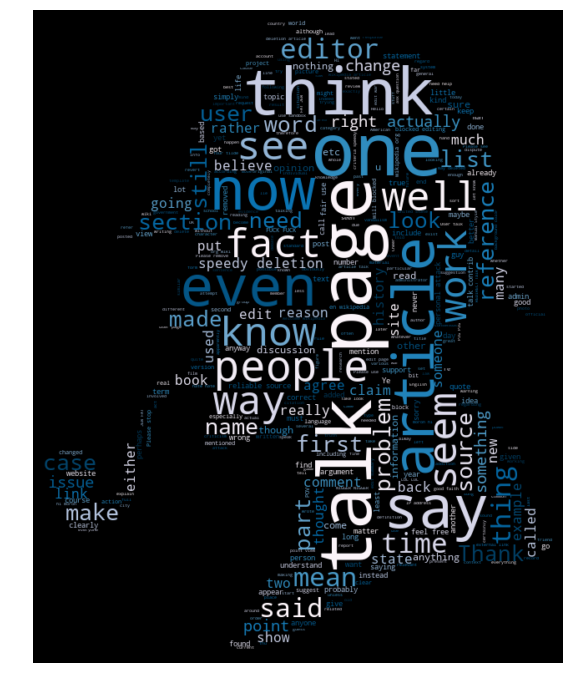

In [12]:
text = train["comment_text"].values
wc = WordCloud(background_color="black", max_words=1000, mask=sherlock_mask, stopwords=stopwords)
wc.generate(" ".join(text))

plt.figure(figsize=(16,12))
plt.imshow(wc.recolor(colormap='PuBu' , random_state=42),interpolation='bilinear')
plt.axis("off")
plt.show()

Bir kelime ne kadar çok kullanılıyorsa o kadar büyük gözüküyor. Wikipedia yorumları hakkında bilgi veren estetik bir görüntü.

Şimdi de standart metin işleme süreçlerinden bahsedelim:

## 1. Tokenize
Wikipedia yorumlarından bir örnek seçelim ve onu .split(“ ”) fonksiyonuyla ayıralım.

In [13]:
train.comment_text.values[2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [14]:
sample = train.comment_text.values[2]
print(sample)
print("")
print(sample.split(" "))

Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.

['Hey', 'man,', "I'm", 'really', 'not', 'trying', 'to', 'edit', 'war.', "It's", 'just', 'that', 'this', 'guy', 'is', 'constantly', 'removing', 'relevant', 'information', 'and', 'talking', 'to', 'me', 'through', 'edits', 'instead', 'of', 'my', 'talk', 'page.', 'He', 'seems', 'to', 'care', 'more', 'about', 'the', 'formatting', 'than', 'the', 'actual', 'info.']


Gördüğünüz gibi ayrılması gereken bazı ögeler ayrılmadı (“I’m”) veya bazı ögeler noktalama işaretiyle birlikte yanlış ayrıldı. (“man,”)

Bu haliyle ilerlememiz mümkün değil nltk kütüphanesi imdadımıza yetişiyor.

In [15]:
import nltk
nltk.download('punkt')
tokens = nltk.word_tokenize(sample)
print(tokens)
print()
print("The number of words in sample is {0}".format(len(tokens)))

[nltk_data] Downloading package punkt to /home/stats/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['Hey', 'man', ',', 'I', "'m", 'really', 'not', 'trying', 'to', 'edit', 'war', '.', 'It', "'s", 'just', 'that', 'this', 'guy', 'is', 'constantly', 'removing', 'relevant', 'information', 'and', 'talking', 'to', 'me', 'through', 'edits', 'instead', 'of', 'my', 'talk', 'page', '.', 'He', 'seems', 'to', 'care', 'more', 'about', 'the', 'formatting', 'than', 'the', 'actual', 'info', '.']

The number of words in sample is 48


İyi güzel istediğimiz gibi ayrıldı ama baş belası birçok StopWords var, bunlardan kurtulmamız gerekiyor.

## 2. Remove StopWords

In [16]:
print(list(set(tokens)-stopwords))
print()
print("The number of words in sample after removing stopwords is {0}".format(len(list(set(tokens)-stopwords))))

['war', "'m", 'I', ',', 'It', 'constantly', 'formatting', 'page', 'He', "'s", 'seems', 'trying', 'info', '.', 'guy', 'removing', 'edits', 'really', 'relevant', 'edit', 'care', 'instead', 'actual', 'Hey', 'talk', 'man', 'talking', 'information']

The number of words in sample after removing stopwords is 28


## 3. Stemmer

Stemmer algoritmaları kelimelerdeki morfolojik ekleri atarak kelime kökünü (stem) bulmaya çalışır. Örneğin aradı, aramış kelimelerinin eklerini atarak köküne ulaşmak oldukça önemli.

Günümüzde en yaygın kullanılan 3 stemmer algoritması: Lancaster, Porter, Snowball. Aralarındaki karşılaştırma için kısa bir cevaba buradan ulaşabilirsiniz. Snowball algoritması için birkaç örnek yapacağım, diğerleri için siz de denemeler yapabilirsiniz. Öncelikle hangi dillerin tanımlı olduğuna bir bakalım.

In [17]:
from nltk.stem import SnowballStemmer
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [18]:
from nltk.stem import SnowballStemmer
print(SnowballStemmer.languages)
print()
snowball = nltk.stem.SnowballStemmer("english")
print(snowball.stem('selling'))
print(snowball.stem('having'))
print(snowball.stem('wolves'))
print(snowball.stem('decreases'))

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')

sell
have
wolv
decreas


İlk ikisi iyi güzel ayrıldı ama son ikili sanki bir sıkıntı var gibi.

## 4. Lemmatizer

Stemming metodunda kelime bağlamdan bağımsız olarak düşünülür ve kelime sonundaki ekler atılır. Hızlıdır tamam ama doğruluk oranı da düşüktür. Bu sefer de imdadımıza kelimelerin sözlükteki anlamını hesaba katan Lemmatizer metodu yetişiyor. Bulmak istediğimiz kökü verb (fiil), adverb (zarf), noun (isim), adjective (sıfat) olarak seçebiliyoruz.

In [19]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wn = WordNetLemmatizer()
print(wn.lemmatize('selling'))
print(wn.lemmatize('having'))
print(wn.lemmatize('wolves'))
print(wn.lemmatize('decreases'))

[nltk_data] Downloading package wordnet to /home/stats/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
selling
having
wolf
decrease


In [20]:
print(wn.lemmatize('selling', pos = 'v'))
print(wn.lemmatize('having', pos = 'v'))

sell
have


## 5. Vectorization

Şimdiye kadar bir cümleyi kelimelere bölmeyi, çok kullanılan bize bilgi vermeyen kelimeleri atmayı, son olarak da kelime köklerini bulmayı gördük. Bu daha başlangıç şimdi cümleleri makine öğrenmesi algoritmalarının anlayacağı hale getirmemiz diğer bir deyişle 0 ve 1'lere çevirmemiz gerekiyor.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cumleler = ["Ali ata bak", 
            "Ali bana bak lütfen"]
vector = CountVectorizer(min_df=0)
vector_cumleler = vector.fit_transform(cumleler)
vector_cumleler

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [22]:
print(vector.get_feature_names())
print()
print(vector_cumleler.toarray())

['ali', 'ata', 'bak', 'bana', 'lütfen']

[[1 1 1 0 0]
 [1 0 1 1 1]]


Yukarıda gördüğünüz cümlelerin içerdiği bütün kelimelerden bir liste yapılıyor ve herhangi bir cümledeki kelimeler bu listedeyse cümle vektörüne 1 değilse 0 işleniyor.

Bu adımdan sonra bambaşka dünyalar bizi bekliyor. Doğal dil işlemeye giriş olması niyetiyle başladığım bu yazıyı çok uzatmadan burada sonlandırıyorum. Önümüzdeki haftalarda doğal dil işlemeyle ilgili ileri seviye yazılar yayınlayacağım.

## The difference between learning theory and practice is that, in theory, they converge but in practice, “Value Error: invalid literal ‘Nan’”.